# Описание проекта

Оператор связи хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах (актуальна на 1 февраля 2020).

### Описание услуг

Оператор предоставляет два основных типа услуг: 

* стационарную телефонную связь;
* интернет. 

Также доступны дополнительные услуги.

### Метрики

* Целевая метрика - *ROC-AUC* (не менее 0,88).
* Дополнительная метрика - *Accuracy* (не нормируется).
* Высокая полнота (*Recall*) - предпочтительнее, чем высокая точность (*Precision*).

# План работы

#### Предобработка данных
Просмотр данных. Очистка данных от пропусков, дубликатов, выбросов, аномалий и т.д. Приведение типов. Переименование столбцов и прочие организационные манипуляции.

#### Исследовательский анализ данных
Более детальное ознакомление с данными. Выделение целевого признака. Исследование связей признаков и целевого признака. Обоснование выявленных тенденций с точки зрения бизнеса.

#### Построение моделей машинного обучения
Подготовка признаков. Итерационно: разработка сетки гиперпараметров, построение и оптимизация ML-моделей.

#### Отчёт о проделанной работе и результатах
Формирование отчёта. Краткое описание этапов работы и достигнутых результатов. Выработка рекомендаций для применения полученной модели в бизнесе.

# Подготовка данных

## Функции

In [1]:
# The function displays the head of the table and general information

def df_info(df):
    d(df.head())
    d(df.info())

In [2]:
# The function converts strings 'Yes' and 'No' into integers '1' and '0' and turns dtype into 'int'

def yes_no_convert(series, true='Yes', false='No'):
    series = series.where(series != true, 1)
    series = series.where(series != false, 0)
    series = series.astype('int')
    
    d(series.value_counts())
    return series

## Ознакомление с данными

Импортируем необходимые библиотеки.

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt

from IPython.display import display as d
import warnings

Настроим среду.

In [4]:
sns.set()
warnings.filterwarnings('ignore')

Загрузим данные из файлов и ознакомимся с ними.

In [5]:
try:
    path = './final_provider/'
    df_contract = pd.read_csv(f'{path}contract.csv')
    df_personal = pd.read_csv(f'{path}personal.csv')
    df_internet = pd.read_csv(f'{path}internet.csv')
    df_phone    = pd.read_csv(f'{path}phone.csv')

except:
    path = '/datasets/final_provider/'
    df_contract = pd.read_csv(f'{path}contract.csv')
    df_personal = pd.read_csv(f'{path}personal.csv')
    df_internet = pd.read_csv(f'{path}internet.csv')
    df_phone    = pd.read_csv(f'{path}phone.csv')

In [6]:
df_info(df_contract)
df_info(df_personal)
df_info(df_internet)
df_info(df_phone)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID       7043 non-null object
gender           7043 non-null object
SeniorCitizen    7043 non-null int64
Partner          7043 non-null object
Dependents       7043 non-null object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
customerID          5517 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
dtypes: object(8)
memory usage: 344.9+ KB


None

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
customerID       6361 non-null object
MultipleLines    6361 non-null object
dtypes: object(2)
memory usage: 99.5+ KB


None

Ни в одной таблице нет пропусков. Однако, это не исключает наличие скрытых пропусков - значений, обозначающих пропуск (например, прочерк, текст 'n/a' и т.п.). Такие пропуски будем выявлять далее.

Таблицы *contract* и *personal* имеют равные длины, и их можно было бы объединить по столбцу *customerID*. Но пока это преждевременно, так как ещё не ясно, что мы будем делать с этими таблицами: возможно, по отдельности с ними будет работать удобнее.

Типы данных требуется приводить во всех четырёх таблицах. Большинство столбцов имеют строковый тип, в то время как на самом деле должны быть другие: int, float, datetime. В некоторых столбцах строковый тип данных является корректным.

Необходимо переименовать столбцы таблиц для более удобной работы с ними.

## Предобработка данных

В этом разделе данные будут подготовлены только для выполнения исследовательского анализа. Для подачи в модели машинного обучения данные будут подготовлены дополнительно в соответствующем разделе.

### Переименование столбцов

Приведём имена столбцов к нижнему регистру.

In [7]:
df_contract.columns = df_contract.columns.str.lower()
df_personal.columns = df_personal.columns.str.lower()
df_internet.columns = df_internet.columns.str.lower()
df_phone.columns    = df_phone.columns.str.lower()

Переименуем столбцы.

In [8]:
try:
    df_contract.rename(columns={'customerid': 'id',
                                'begindate': 'begin',
                                'enddate': 'end',
                                'paperlessbilling': 'paperless',
                                'paymentmethod': 'payment',
                                'monthlycharges': 'monthly',
                                'totalcharges': 'total'
                               },
                      inplace=True
                      )
except:
    None

In [9]:
try:
    df_personal.rename(columns={'customerid': 'id',
                                'seniorcitizen': 'senior'
                               },
                      inplace=True
                      )
except:
    None

In [10]:
try:
    df_internet.rename(columns={'customerid': 'id',
                                'internetservice': 'serv',
                                'onlinesecurity': 'secr',
                                'onlinebackup': 'back',
                                'deviceprotection': 'devp',
                                'techsupport': 'supp',
                                'streamingtv': 'sttv',
                                'streamingmovies': 'stmv'
                               },
                      inplace=True
                      )
except:
    None

In [11]:
try:
    df_phone.rename(columns={'customerid': 'id',
                             'multiplelines': 'multi'
                            },
                    inplace=True
                   )
except:
    None

In [12]:
d(df_contract.head(1))
d(df_personal.head(1))
d(df_internet.head(1))
d(df_phone.head(1))

,id,begin,end,type,paperless,payment,monthly,total
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85


,id,gender,senior,partner,dependents
0,7590-VHVEG,Female,0,Yes,No


,id,serv,secr,back,devp,supp,sttv,stmv
0,7590-VHVEG,DSL,No,Yes,No,No,No,No


,id,multi
0,5575-GNVDE,No


Теперь можно приступить к детальному рассмотрению каждого столбца. Будем выявлять пропуски (неявные), дубликаты, аномалии, выбросы, а также корректировать типы данных.

### Таблица *df_contract*

Рассмотрим каждый столбец по отдельности.

In [13]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
id           7043 non-null object
begin        7043 non-null object
end          7043 non-null object
type         7043 non-null object
paperless    7043 non-null object
payment      7043 non-null object
monthly      7043 non-null float64
total        7043 non-null object
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


#### Столбец *id*

Проверим столбец на наличие дубликатов.

In [14]:
df_contract.id.duplicated().sum()

0

Отсутствие дубликатов косвенно говорит и об отсутствии неявных пропусков: пропуски, обозначенные однообразно, проявили бы себя как дубликаты.

Всё остальное - в порядке.

#### Столбец *begin*

Приведём тип данных к типу datetime.

In [15]:
df_contract.begin = pd.to_datetime(df_contract.begin)

Проверим столбец на наличие выбросов и аномалий.

In [16]:
df_contract.begin.describe()

count                    7043
unique                     77
top       2014-02-01 00:00:00
freq                      366
first     2013-10-01 00:00:00
last      2020-02-01 00:00:00
Name: begin, dtype: object

Всё корректно.

#### Столбец *end*

Заменим строки 'No' на пропуски. В столбце останутся только корректно записанные даты, которые мы приведём к типу данных datetime.

Пропуски в данном случае не означают отсутствие информации. Они лишь означают, что клиент ещё не перестал пользоваться услугами компании, а договор между ними - в силе.

Наличие даты означает, что клиент ушёл из компании (в эту дату).

In [17]:
df_contract.end = df_contract.end.where(df_contract.end!='No' )

Приведём тип данных к типу datetime.

In [18]:
df_contract.end = pd.to_datetime(df_contract.end)

Проверим столбец на наличие выбросов и аномалий.

In [19]:
df_contract.end.describe()

count                    1869
unique                      4
top       2019-11-01 00:00:00
freq                      485
first     2019-10-01 00:00:00
last      2020-01-01 00:00:00
Name: end, dtype: object

Выбросов нет.

Уникальных значений - всего четыре. Рассмотрим их подробнее.

In [20]:
df_contract.end.value_counts()

2019-11-01    485
2019-12-01    466
2020-01-01    460
2019-10-01    458
Name: end, dtype: int64

Клиенты уходили только в последние 4 месяца, в то время как данные имеются более чем за 7 лет. Это выглядит странно. Отметим этот факт как аномалию. Необходимо проконсультироваться с тимлидом.

#### Столбец *type*

Посмотрим, какие есть уникальные значения.

In [21]:
df_contract.type.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: type, dtype: int64

Всего три способа оплаты. Как следует из их названия, - ежемесячно, ежегодно, каждые два года.

Никаких проблем нет, столбец можно оставить в нынешнем виде.

#### Столбец *paperless*

Посмотрим на уникальные значения.

In [22]:
df_contract.paperless.value_counts()

Yes    4171
No     2872
Name: paperless, dtype: int64

Данные в столбце - бинарные.

Заменим 'Yes' на '1', а 'No' - на '0'. Приведём тип данных к int.

In [23]:
df_contract.paperless = yes_no_convert(df_contract.paperless)

1    4171
0    2872
Name: paperless, dtype: int64

#### Столбец *payment*

Посмотрим, какие есть уникальные значения.

In [24]:
df_contract.payment.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment, dtype: int64

Четыре возможных метода оплаты. Аномалий нет.

#### Столбец *monthly*

Посмотрим описание данных.

In [25]:
df_contract.monthly.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthly, dtype: float64

Нет ни выбросов, ни аномалий: всё в адекватных пределах.

#### Столбец *total*

Необходимо привести тип данных к float. Однако, в ходе выполнения приведения возникает ошибка: какие-то значения не удаётся преобразовать. Найдём их.

In [26]:
wrong_value_index = []

for i, value in enumerate(df_contract.total):
    try:
        float(value)
    except:
        wrong_value_index.append(i)

len(wrong_value_index)

11

Всего 11 некорректных значений. Рассмотрим их. 

In [27]:
df_contract.loc[wrong_value_index]

,id,begin,end,type,paperless,payment,monthly,total
488,4472-LVYGI,2020-02-01,NaT,Two year,1,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,NaT,Two year,0,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,NaT,Two year,0,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,NaT,Two year,0,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,NaT,Two year,0,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,NaT,Two year,0,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,NaT,Two year,0,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,NaT,Two year,0,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,NaT,One year,1,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,NaT,Two year,0,Mailed check,73.35,


А вот и скрытые пропуски. Все рассматриваемые клиенты заключили договор с компанией в феврале 2020 года, т.е. как раз на момент выгрузки данных. Ещё не прошло ни одного полного месяца, поэтому в столбце *total* ничего не накопилось.

В таком случае, заполним *total* значениями из *monthly* (сумма за один месяц). Это позволит обойтись без нулей и, вместе с тем, будет близко к истине.

In [28]:
df_contract.loc[wrong_value_index, 'total'] = df_contract.loc[wrong_value_index, 'monthly']
df_contract.loc[wrong_value_index].head()

,id,begin,end,type,paperless,payment,monthly,total
488,4472-LVYGI,2020-02-01,NaT,Two year,1,Bank transfer (automatic),52.55,52.55
753,3115-CZMZD,2020-02-01,NaT,Two year,0,Mailed check,20.25,20.25
936,5709-LVOEQ,2020-02-01,NaT,Two year,0,Mailed check,80.85,80.85
1082,4367-NUYAO,2020-02-01,NaT,Two year,0,Mailed check,25.75,25.75
1340,1371-DWPAZ,2020-02-01,NaT,Two year,0,Credit card (automatic),56.05,56.05


Приведём тип данных к float.

In [29]:
df_contract.total = df_contract.total.astype('float').round(2)

Посмотрим описание данных.

In [30]:
df_contract.total.describe()

count    7043.000000
mean     2279.798992
std      2266.730170
min        18.800000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: total, dtype: float64

Среднее весьма близко к медиане: выбросы - единичны.

#### Результаты преобразований таблицы *df_contract*

In [31]:
df_info(df_contract)

,id,begin,end,type,paperless,payment,monthly,total
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,1,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,NaT,One year,0,Mailed check,56.95,1889.50
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,NaT,One year,0,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,1,Electronic check,70.70,151.65


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
id           7043 non-null object
begin        7043 non-null datetime64[ns]
end          1869 non-null datetime64[ns]
type         7043 non-null object
paperless    7043 non-null int32
payment      7043 non-null object
monthly      7043 non-null float64
total        7043 non-null float64
dtypes: datetime64[ns](2), float64(2), int32(1), object(3)
memory usage: 412.8+ KB


None

Предобработка таблицы *df_contract* выполнена. Пропуски в столбце *end* могут быть заполнены заглушками по мере необходимости далее.

### Таблица *df_personal*

Рассмотрим каждый столбец по отдельности.

In [32]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
id            7043 non-null object
gender        7043 non-null object
senior        7043 non-null int64
partner       7043 non-null object
dependents    7043 non-null object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


#### Столбец *id*

Проверим столбец на наличие дубликатов.

In [33]:
df_personal.id.duplicated().sum()

0

Всё в порядке.

#### Столбец *gender*

In [34]:
df_personal.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

Всё корректно.

#### Столбец *senior*

In [35]:
df_personal.senior.value_counts()

0    5901
1    1142
Name: senior, dtype: int64

Никаких проблем.

#### Столбец *partner*

In [36]:
df_personal.partner.value_counts()

No     3641
Yes    3402
Name: partner, dtype: int64

Что означает этот столбец, выясним у тимлида.

Тем не менее, очевидно, что данные в этом столбце - бинарные. Заменим 'Yes' и 'No' на 1 и 0 соответственно.

In [37]:
df_personal.partner = yes_no_convert(df_personal.partner)

0    3641
1    3402
Name: partner, dtype: int64

#### Столбец *dependents*

In [38]:
df_personal.dependents.value_counts()

No     4933
Yes    2110
Name: dependents, dtype: int64

Значение этого столбца будем также выяснять у тимлида.

Данные - снова бинарные. Выполним замену.

In [39]:
df_personal.dependents = yes_no_convert(df_personal.dependents)

0    4933
1    2110
Name: dependents, dtype: int64

#### Результаты преобразований таблицы *df_personal*

In [40]:
df_info(df_personal)

,id,gender,senior,partner,dependents
0,7590-VHVEG,Female,0,1,0
1,5575-GNVDE,Male,0,0,0
2,3668-QPYBK,Male,0,0,0
3,7795-CFOCW,Male,0,0,0
4,9237-HQITU,Female,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
id            7043 non-null object
gender        7043 non-null object
senior        7043 non-null int64
partner       7043 non-null int32
dependents    7043 non-null int32
dtypes: int32(2), int64(1), object(2)
memory usage: 220.2+ KB


None

Предобработка таблицы *df_personal* выполнена.

### Таблица *df_internet*

In [41]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
id      5517 non-null object
serv    5517 non-null object
secr    5517 non-null object
back    5517 non-null object
devp    5517 non-null object
supp    5517 non-null object
sttv    5517 non-null object
stmv    5517 non-null object
dtypes: object(8)
memory usage: 344.9+ KB


#### Столбец *id*

Проверим столбец на наличие дубликатов.

In [42]:
df_internet.id.duplicated().sum()

0

Всё в порядке.

#### Столбец *serv*

In [43]:
df_internet.serv.value_counts()

Fiber optic    3096
DSL            2421
Name: serv, dtype: int64

Всё корректно. Пока можно оставить в таком виде.

#### Столбцы *secr*, *back*, *devp*, *supp*, *sttv*, *stmv*

Все эти столбцы содержат бинарные данные. Преобразуем их при помощи функции *yes_no_convert*.

In [44]:
df_internet.secr = yes_no_convert(df_internet.secr)
df_internet.back = yes_no_convert(df_internet.back)
df_internet.devp = yes_no_convert(df_internet.devp)
df_internet.supp = yes_no_convert(df_internet.supp)
df_internet.sttv = yes_no_convert(df_internet.sttv)
df_internet.stmv = yes_no_convert(df_internet.stmv)

0    3498
1    2019
Name: secr, dtype: int64

0    3088
1    2429
Name: back, dtype: int64

0    3095
1    2422
Name: devp, dtype: int64

0    3473
1    2044
Name: supp, dtype: int64

0    2810
1    2707
Name: sttv, dtype: int64

0    2785
1    2732
Name: stmv, dtype: int64

Столбцы приведены к int корректно. Пропусков нет.

#### Результаты преобразований таблицы *df_internet*

In [45]:
df_info(df_internet)

,id,serv,secr,back,devp,supp,sttv,stmv
0,7590-VHVEG,DSL,0,1,0,0,0,0
1,5575-GNVDE,DSL,1,0,1,0,0,0
2,3668-QPYBK,DSL,1,1,0,0,0,0
3,7795-CFOCW,DSL,1,0,1,1,0,0
4,9237-HQITU,Fiber optic,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
id      5517 non-null object
serv    5517 non-null object
secr    5517 non-null int32
back    5517 non-null int32
devp    5517 non-null int32
supp    5517 non-null int32
sttv    5517 non-null int32
stmv    5517 non-null int32
dtypes: int32(6), object(2)
memory usage: 215.6+ KB


None

Предобработка таблицы *df_internet* выполнена.

### Таблица *df_phone*

Рассмотрим каждый столбец по отдельности.

In [46]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
id       6361 non-null object
multi    6361 non-null object
dtypes: object(2)
memory usage: 99.5+ KB


#### Столбец *id*

Проверим столбец на наличие дубликатов.

In [47]:
df_phone.id.duplicated().sum()

0

Дубликатов нет.

#### Столбец *multi*

Столбец содержит бинарные данные, и его необходимо преобразовать, как в предыдущих случаях.

In [48]:
df_phone.multi = yes_no_convert(df_phone.multi)

0    3390
1    2971
Name: multi, dtype: int64

#### Результаты преобразований таблицы *df_phone*

In [49]:
df_info(df_phone)

,id,multi
0,5575-GNVDE,0
1,3668-QPYBK,0
2,9237-HQITU,0
3,9305-CDSKC,1
4,1452-KIOVK,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
id       6361 non-null object
multi    6361 non-null int32
dtypes: int32(1), object(1)
memory usage: 74.7+ KB


None

Предобработка таблицы *df_phone* выполнена.

### Проверка соответствия столбцов *id* друг другу в разных таблицах

Проверим, совпадают ли столбцы *id* между собой (входит ли меньший список в больший). Это необходимо для понимания, каких клиентов описывают таблицы: одних и тех же, или в каждой таблице - свой список?

Подразумевается, что все таблицы описывают одну и ту же выборку. Но в этом нужно удостовериться.

#### *df_contract* и *df_personal*

In [50]:
df_personal.id.shape[0] == df_personal.id.isin(df_contract.id).sum()

True

#### *df_contract* и *df_internet*

In [51]:
df_internet.id.shape[0] == df_internet.id.isin(df_contract.id).sum()

True

#### *df_contract* и *df_phone*

In [52]:
df_phone.id.shape[0] == df_phone.id.isin(df_contract.id).sum()

True

Теперь видно, что все четыре таблицы - об одних и тех же клиентах.

### Перенос *id* клиентов в индекс

Перенесём *id* клиентов в индекс таблиц.

In [53]:
df_contract.set_index('id', inplace=True)
df_personal.set_index('id', inplace=True)
df_internet.set_index('id', inplace=True)
df_phone.set_index('id', inplace=True)

### Результаты предобработки данных

Выведем по несколько строк из каждой таблицы и информацию, чтобы увидеть результаты предобработки.

In [54]:
d(df_info(df_contract))
d(df_info(df_personal))
d(df_info(df_internet))
d(df_info(df_phone))

,begin,end,type,paperless,payment,monthly,total
id,,,,,,,
7590-VHVEG,2020-01-01,NaT,Month-to-month,1,Electronic check,29.85,29.85
5575-GNVDE,2017-04-01,NaT,One year,0,Mailed check,56.95,1889.50
3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,53.85,108.15
7795-CFOCW,2016-05-01,NaT,One year,0,Bank transfer (automatic),42.30,1840.75
9237-HQITU,2019-09-01,2019-11-01,Month-to-month,1,Electronic check,70.70,151.65


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
begin        7043 non-null datetime64[ns]
end          1869 non-null datetime64[ns]
type         7043 non-null object
paperless    7043 non-null int32
payment      7043 non-null object
monthly      7043 non-null float64
total        7043 non-null float64
dtypes: datetime64[ns](2), float64(2), int32(1), object(2)
memory usage: 412.7+ KB


None

None

,gender,senior,partner,dependents
id,,,,
7590-VHVEG,Female,0,1,0
5575-GNVDE,Male,0,0,0
3668-QPYBK,Male,0,0,0
7795-CFOCW,Male,0,0,0
9237-HQITU,Female,0,0,0


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 4 columns):
gender        7043 non-null object
senior        7043 non-null int64
partner       7043 non-null int32
dependents    7043 non-null int32
dtypes: int32(2), int64(1), object(1)
memory usage: 220.1+ KB


None

None

,serv,secr,back,devp,supp,sttv,stmv
id,,,,,,,
7590-VHVEG,DSL,0,1,0,0,0,0
5575-GNVDE,DSL,1,0,1,0,0,0
3668-QPYBK,DSL,1,1,0,0,0,0
7795-CFOCW,DSL,1,0,1,1,0,0
9237-HQITU,Fiber optic,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
Index: 5517 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
serv    5517 non-null object
secr    5517 non-null int32
back    5517 non-null int32
devp    5517 non-null int32
supp    5517 non-null int32
sttv    5517 non-null int32
stmv    5517 non-null int32
dtypes: int32(6), object(1)
memory usage: 215.5+ KB


None

None

,multi
id,
5575-GNVDE,0
3668-QPYBK,0
9237-HQITU,0
9305-CDSKC,1
1452-KIOVK,1


<class 'pandas.core.frame.DataFrame'>
Index: 6361 entries, 5575-GNVDE to 3186-AJIEK
Data columns (total 1 columns):
multi    6361 non-null int32
dtypes: int32(1)
memory usage: 74.5+ KB


None

None

## Вывод по подготовке данных

Данные - изначально в хорошем состоянии. Практически полностью отсутствуют пропуски. Отсутствуют дубликаты, выбросы, аномалии. Изменены имена столбцов для удобства работы с ними.

Предобработка, в основном, состояла из приведения типов: большинство столбцов являлись строковыми, в то время как реальные типы данных этих столбцов - int, float, datetime.

Подтверждено, что все четыре таблицы содержат данные по одной и той же выборке клиентов.

Предобработка данных выполнена в объёме, необходимом для проведения исследовательского анализа данных. Для работы с моделями машинного обучения данные необходимо будет подготовить дополнительно.

# Исследовательский анализ данных

## Функции

In [55]:
# The function fills NaN-cells in the *duration* column according to the actual date

def duration_filling(x, date_actual):
    end_date = x.end
    if pd.isna(x.end) == True:
        end_date = date_actual
    return (end_date - x.begin).days

In [56]:
# The function plots barplots for the categorical features and distplots for the numerical features
# Also, it calculates the percentage of the amount of churned for the categoricals

def plots(df, features_list, cat_mode=True, hue='churn', tick_rotation=True):
    plt.figure(figsize=(16, 8))
    
    features_type = 'Distplots for the numerical'
    if cat_mode == True:
        features_type = 'Barplots for the categorical'
    
    plt.suptitle(f'{features_type} features of the "{df.name}" dataframe')
    
    output_df = []
    
    for i, feat in enumerate(features_list):
        n_cols = len(features_list)
        if n_cols < 3:
            n_cols = 3
        
        plt.subplot(1, n_cols, 1+i)
        
        if cat_mode == True:
            str_convert = False
            val_list = df[feat].unique()
            if df[feat].dtype == 'int64':
                df[feat] = df[feat].astype('str')
                val_list = np.sort(df[feat].unique())
                str_convert = True

            output_data = []
            
            for val in val_list:
                churned = df[feat][(df[feat] == val) & (df[hue] == 1)].count()
                not_churned = df[feat][(df[feat] == val) & (df[hue] == 0)].count()

                output_data.append([(churned + not_churned),
                                    (100 * (churned + not_churned) / df.shape[0]).round(1),
                                    churned,
                                    (100 * churned / (churned + not_churned)).round(1)])
                legend = []
            
                plt.bar(x=val, height=churned+not_churned, width=-0.4, align='edge', color=sns.color_palette('deep')[0])
                legend.append('total')
                
                plt.bar(x=val, height=churned, width=0.4, align='edge', color=sns.color_palette('deep')[1])
                legend.append('churned')

                plt.legend(legend)
                plt.xlabel(feat)
            
            output_df.append(pd.DataFrame(data=output_data,
                                          index=val_list,
                                          columns=['total', 'total (ratio)', 'churned', 'churned (ratio)']
                                         )
                            )
            
            if str_convert == True:
                df[feat] = df[feat].astype('int')
            
        else:
            legend = []
            
            sns.distplot(df[feat], kde=False, bins=30)
            legend.append('total')
            
            sns.distplot(df[feat][df[hue] == 1], kde=False, bins=30)
            legend.append('churned')
            
            plt.legend(legend)
        
        plt.tight_layout(rect=(0, 0, 1, 0.9))

        if tick_rotation == True:
            plt.xticks(rotation=45)
        else:
            plt.xticks(rotation=0)

    plt.show()
    
    for i, df in enumerate(output_df):
        print(f'\n{features_list[i]}:')
        d(df)

## Подготовительная часть

### Задачи для исследовательского анализа данных

Необходимо исследовать связь факта ухода клиента из компании со следующими факторами.
* Все категориальные признаки. Если признак имеет более двух возможных значений (не бинарный), то исследовать детально по каждому значению.
* Количественные признаки (размер ежемесячной платы и суммарная уплаченная сумма).
* Длительность пребывания клиента в компании.

### Подготовка данных

Чтобы исследовать влияние различных факторов на принятие клиентом решения об уходе из компании, необходимо немного модифицировать таблицы с данными. Сделаем следующее:
* добавим в каждую таблицу бинарный столбец *churn*, отражающий факт ухода клиента из компании;
* добавим в таблицу *df_contract* столбец *duration*, отражающий длительность пребывания клиента в компании.

#### Сохранение копий исходных датасетов

Для того, чтобы дальнейшая работа шла удобнее и безопаснее, сохраним в отдельных переменных копии исходных датасетов (в текущем состоянии, т.е. после предобработки).

Так как для этого потребуется незначительный объём памяти, просто скопируем переменные.

In [57]:
df_contract_original = df_contract.copy()
df_personal_original = df_personal.copy()
df_internet_original = df_internet.copy()
df_phone_original = df_phone.copy()

#### Добавление столбца *churn*

Добавим столбец *churn* в таблицу *df_contract*.

In [58]:
df_contract['churn'] = df_contract.apply(lambda x: pd.isna(x.end)==False, axis=1)
df_contract.churn = yes_no_convert(df_contract.churn, true=True, false=False)
df_contract.head()

0    5174
1    1869
Name: churn, dtype: int64

,begin,end,type,paperless,payment,monthly,total,churn
id,,,,,,,,
7590-VHVEG,2020-01-01,NaT,Month-to-month,1,Electronic check,29.85,29.85,0
5575-GNVDE,2017-04-01,NaT,One year,0,Mailed check,56.95,1889.50,0
3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,53.85,108.15,1
7795-CFOCW,2016-05-01,NaT,One year,0,Bank transfer (automatic),42.30,1840.75,0
9237-HQITU,2019-09-01,2019-11-01,Month-to-month,1,Electronic check,70.70,151.65,1


Добавим столбец *churn* в таблицу *df_personal*.

In [59]:
df_personal = df_personal.merge(df_contract['churn'], right_index=True, left_on='id')
df_personal.head()

,gender,senior,partner,dependents,churn
id,,,,,
7590-VHVEG,Female,0,1,0,0
5575-GNVDE,Male,0,0,0,0
3668-QPYBK,Male,0,0,0,1
7795-CFOCW,Male,0,0,0,0
9237-HQITU,Female,0,0,0,1


Добавим столбец *churn* в таблицу *df_internet*.

In [60]:
df_internet = df_internet.merge(df_contract['churn'], right_index=True, left_on='id')
df_internet.head()

,serv,secr,back,devp,supp,sttv,stmv,churn
id,,,,,,,,
7590-VHVEG,DSL,0,1,0,0,0,0,0
5575-GNVDE,DSL,1,0,1,0,0,0,0
3668-QPYBK,DSL,1,1,0,0,0,0,1
7795-CFOCW,DSL,1,0,1,1,0,0,0
9237-HQITU,Fiber optic,0,0,0,0,0,0,1


Добавим столбец *churn* в таблицу *df_phone*.

In [61]:
df_phone = df_phone.merge(df_contract['churn'], right_index=True, left_on='id')
df_phone.head()

,multi,churn
id,,
5575-GNVDE,0,0
3668-QPYBK,0,1
9237-HQITU,0,1
9305-CDSKC,1,1
1452-KIOVK,1,0


Вычислим долю выбывших клиентов.

In [62]:
df_contract[df_contract.churn == 1].shape[0] / df_contract.shape[0]

0.2653698707936959

Выбыло всего 26,5% клиентов - каждый четвёртый.

#### Добавление столбца *duration*

Добавим столбец *duration*, содержащий информацию о длительности пребывания клиента в компании.

Пропуски заполним разностью между 01 февраля 2020 года (на эту дату актуальна информация о договорах) и значением столбца *begin* (дата прихода клиента в компанию).

In [63]:
date_actual = dt.datetime.strptime('2020-02-01', '%Y-%m-%d')
df_contract['duration'] = df_contract.apply(duration_filling, axis=1, date_actual=date_actual)
df_contract.head()

,begin,end,type,paperless,payment,monthly,total,churn,duration
id,,,,,,,,,
7590-VHVEG,2020-01-01,NaT,Month-to-month,1,Electronic check,29.85,29.85,0,31
5575-GNVDE,2017-04-01,NaT,One year,0,Mailed check,56.95,1889.50,0,1036
3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,53.85,108.15,1,61
7795-CFOCW,2016-05-01,NaT,One year,0,Bank transfer (automatic),42.30,1840.75,0,1371
9237-HQITU,2019-09-01,2019-11-01,Month-to-month,1,Electronic check,70.70,151.65,1,61


Проверим столбец *duration* на некорректные значения.

In [64]:
df_contract[df_contract.duration <= 0]

,begin,end,type,paperless,payment,monthly,total,churn,duration
id,,,,,,,,,
4472-LVYGI,2020-02-01,NaT,Two year,1,Bank transfer (automatic),52.55,52.55,0,0
3115-CZMZD,2020-02-01,NaT,Two year,0,Mailed check,20.25,20.25,0,0
5709-LVOEQ,2020-02-01,NaT,Two year,0,Mailed check,80.85,80.85,0,0
4367-NUYAO,2020-02-01,NaT,Two year,0,Mailed check,25.75,25.75,0,0
1371-DWPAZ,2020-02-01,NaT,Two year,0,Credit card (automatic),56.05,56.05,0,0
7644-OMVMY,2020-02-01,NaT,Two year,0,Mailed check,19.85,19.85,0,0
3213-VVOLG,2020-02-01,NaT,Two year,0,Mailed check,25.35,25.35,0,0
2520-SGTTA,2020-02-01,NaT,Two year,0,Mailed check,20.00,20.00,0,0
2923-ARZLG,2020-02-01,NaT,One year,1,Mailed check,19.70,19.70,0,0


Отрицательных значений нет, а нули появились только в тех строках, в которых *begin* равен актуальной дате, т.е. клиент пробыл в компании ноль полных месяцев.

#### Удаление некорректных строк

Строго говоря, в этих строках (последняя таблица выше) значения столбца *duration* - корректные: клиент пробыл в компании ноль полных месяцев. Но из-за того, что они зануляются (столбец *total* был тоже именно занулён, а не просто пропущен), проще избавиться от них, чем каждый раз обрабатывать их отдельно, помнить о всяких допущениях и т.д.

На этапе предобработки мы не стали удалять эти строки. Сейчас же представляется, что всё-таки их лучше удалить.

Удалим эти строки из всех таблиц по индексу.

In [65]:
index_bad = df_contract[df_contract.duration <= 0].index
d(index_bad)

df_contract.drop(index_bad, inplace=True)

Index(['4472-LVYGI', '3115-CZMZD', '5709-LVOEQ', '4367-NUYAO', '1371-DWPAZ',
       '7644-OMVMY', '3213-VVOLG', '2520-SGTTA', '2923-ARZLG', '4075-WKNIU',
       '2775-SEFEE'],
      dtype='object', name='id')

In [66]:
df_personal.drop(df_personal[df_personal.index.isin(index_bad)].index, inplace=True)
df_internet.drop(df_internet[df_internet.index.isin(index_bad)].index, inplace=True)
df_phone.drop(df_phone[df_phone.index.isin(index_bad)].index, inplace=True)

In [67]:
d(df_contract.shape[0])
d(df_personal.shape[0])
d(df_internet.shape[0])
d(df_phone.shape[0])

7032

7032

5512

6352

Проблемные строки удалены.

#### Присвоение имён датафреймам

Присвоим имена датафреймам.

In [68]:
df_contract.name = 'contract'
df_personal.name = 'personal'
df_internet.name = 'internet'
df_phone.name = 'phone'

Теперь данные подготовлены, и можно переходить непосредственно к исследовательскому анализу.

## Влияние деталей договора

### Категориальные признаки

Для того, чтобы изучить влияние на отток клиентов категориальных признаков, построим столбчатые диаграммы.

Перед этим сформируем список таких признаков.

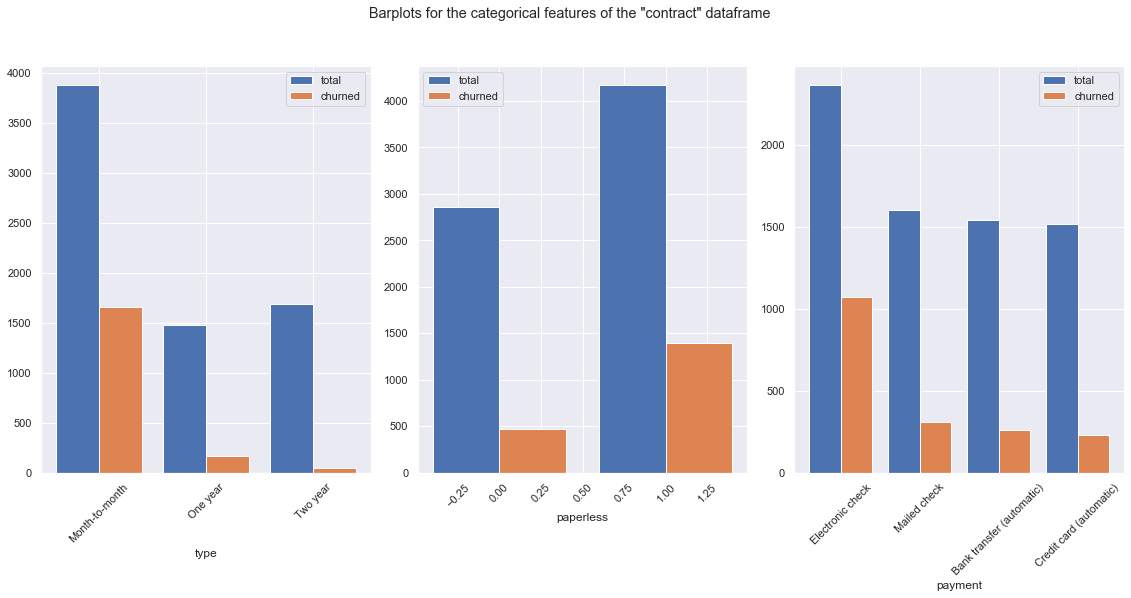


type:


,total,total (ratio),churned,churned (ratio)
Month-to-month,3875,55.1,1655,42.7
One year,1472,20.9,166,11.3
Two year,1685,24.0,48,2.8



paperless:


,total,total (ratio),churned,churned (ratio)
1,4168,59.3,1400,33.6
0,2864,40.7,469,16.4



payment:


,total,total (ratio),churned,churned (ratio)
Electronic check,2365,33.6,1071,45.3
Mailed check,1604,22.8,308,19.2
Bank transfer (automatic),1542,21.9,258,16.7
Credit card (automatic),1521,21.6,232,15.3


In [69]:
cat_list = ['type', 'paperless', 'payment']

plots(df_contract, features_list=cat_list)

##### Тип договора
От того, на какой срок заключен договор, существенно зависит вероятность ухода. Клиенты, оплачивающие услуги ежемесячно, уходят из компании соответственно в 4 и 15 раз чаще, чем те, кто заключает договор сразу на год (ушли 11,3%) или на два (2,8%). В абсолютном выражении компанию покидают два "ежемесячника" из пяти (42,7%). Возможно, они изначально понимают, что становятся клиентами ненадолго, поэтому не заключают долгосрочные договоры. Вместе с тем, клиентов, оплачивающих услуги ежемесячно, - больше половины (самая многочисленная категория).

##### Безбумажные счета
Клиентов, получающих счета в электронном виде, больше в полтора раза, чем получающих их на бумажном носителе. Компанию покинул каждый третий клиент (33,6%), получающий электронный счёт, и каждый шестой (16,4%) - счёт на бумаге.

##### Способ оплаты
Клиенты выбирают оплату электронным чеком несколько чаще, чем другими способами (три других способа - примерно поровну). Но эти же клиенты намного чаще уходят: почти половина (45,3%), в то время как остальные клиенты (выбравшие не электронный чек в качестве способа оплаты) покидают компанию только в каждом пятом случае (от 15,3 до 19,2%).

### Количественные признаки

Для того, чтобы изучить влияние на отток клиентов количественных признаков, построим частотные гистограммы.

Перед этим сформируем список таких признаков.

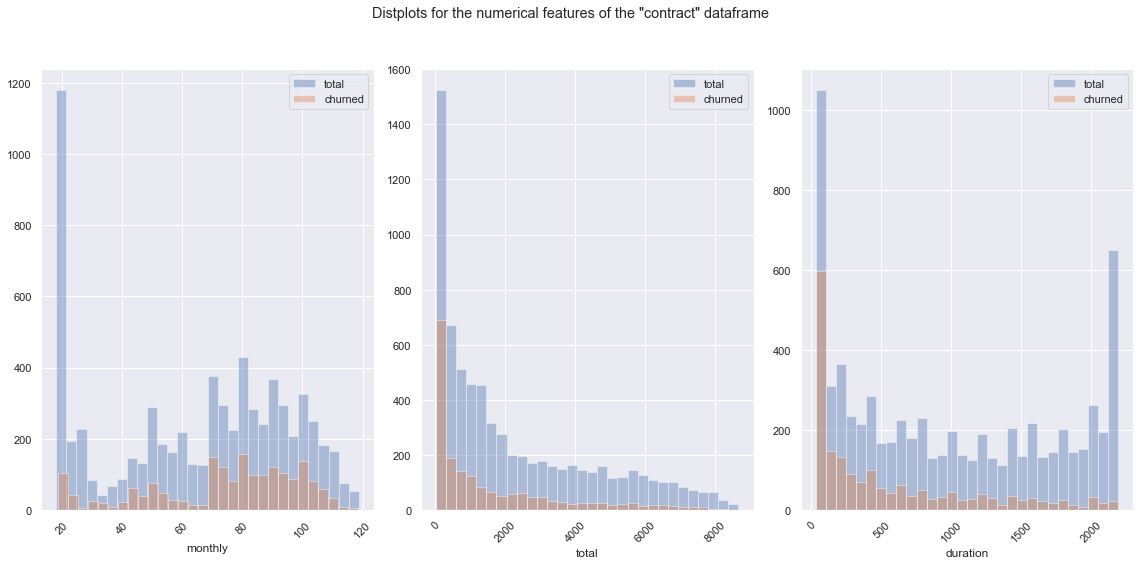

In [70]:
num_list = ['monthly', 'total', 'duration']

plots(df_contract, features_list=num_list, cat_mode=False)

##### Размер ежемесячного платежа
Многие клиенты платят за услуги порядка 20 USD в месяц - минимально возможную сумму или близкую к ней. Характер выброса на гистограмме позволяет сделать два предположения:
* минимального пакета услуг многим клиентам вполне достаточно (нет необходимости приобретать дополнительные услуги);
* некоторые из этих клиентов готовы сэкономить ещё больше (в т.ч. соглашаясь с урезанием объёма услуг по сравнению с нынешним), но "упёрлись" в минимум.

В этом ценовом сегменте относительный уровень оттока клиентов - один из самых низких во всём ценовом диапазоне.

Наиболее значительный отток, как относительный, так и абсолютный, наблюдается в сегменте 70...100 USD в месяц. Возможно, эти клиенты уходят к конкурентам, предложившим более выгодные условия. Чем выше размер платежа, тем больше у оператора мотивация удержать такого клиента и, одновременно, больше возможностей для этого: на высокую цену сделать скидку проще, чем на минимальную.

##### Сумма, уплаченная за всё время
Чётко видна тенденция: чем больше денег клиент заплатил компании за услуги, тем он лояльнее. Причём тенденция эта прослеживается и в соотношении выбывших клиентов к их общему числу - это тоже видно на диаграмме: в левой части соотношение - примерно 1 к 3, в середине - 1 к 5, а в правой части - стремится к нулю (никто не выбыл).

Больше всего выбывших - среди новичков: из тех, кто успел отдать компании 300 USD и менее, выбывает почти половина. Причём эта сумма может быть растянута во времени (различный размер ежемесячного платежа), но в конечном итоге это ничего не меняет. Возможно, причина кроется в некоей политике стартовых бонусов: бонусы кончились - можно уходить. Или - банально: попробовали - не понравилось.

##### Длительность пользования услугами компании
Диаграмма длительности пребывания в компании в качестве клиента очень похожа на диаграмму уплаченной за всё время суммы. Это вполне логично: клиент вносит регулярные платежи, и их сумма пропорциональна длительности периода, в течение которых эти платежи вносят. Но есть и различия: менее выраженное убывание, а затем - рост. Различия обусловлены разными размерами ежемесячного платежа.

На диаграмме видно, что в первые полгода уход клиента весьма вероятен (выброс слева): покидают компанию более половины новых клиентов. Причины - те же, что описаны выше. Разные размеры ежемесячного платежа позволяют различным клиентам "жить" на 300 USD разное количество времени. Поэтому огибающая гистограммы - не настолько крутая, как в предыдущем случае.

Выброс справа отражает некоторый яркий момент в прошлом, связанный с массовым одномоментным привлечением клиентов: "шумный" вход на рынок, акции и скидки на старте и т.п. Данные говорят нам о том, что такие клиенты - лояльные: отток среди них - один из самых низких.

## Влияние персональных данных клиента

### Категориальные признаки

В таблице *df_personal* имеются только категориальные признаки.

Исследуем эти признаки так же, как в предыдущем подразделе.

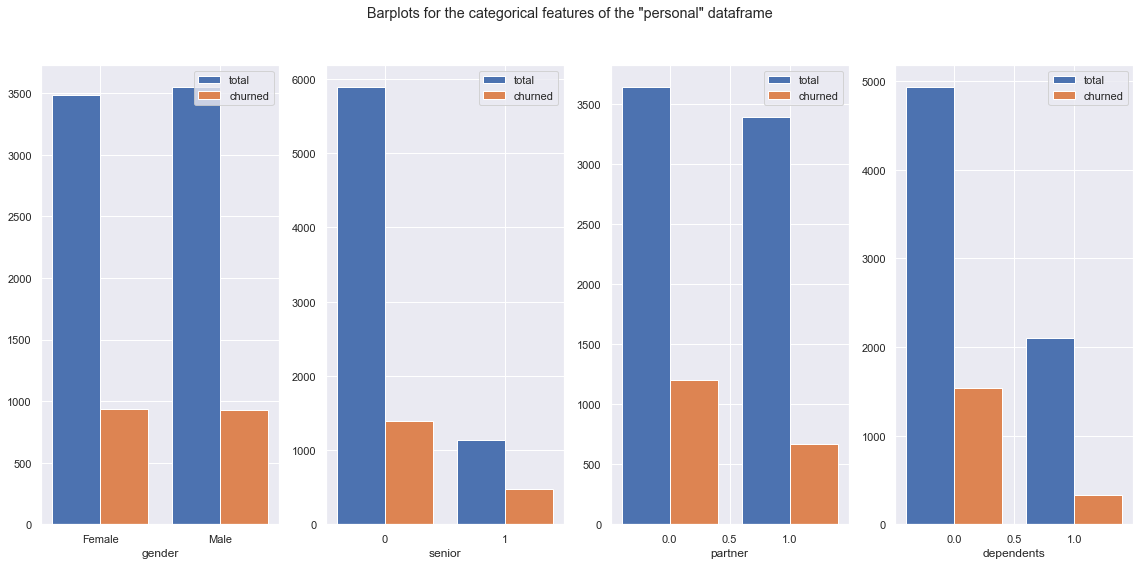


gender:


,total,total (ratio),churned,churned (ratio)
Female,3483,49.5,939,27.0
Male,3549,50.5,930,26.2



senior:


,total,total (ratio),churned,churned (ratio)
0,5890,83.8,1393,23.7
1,1142,16.2,476,41.7



partner:


,total,total (ratio),churned,churned (ratio)
1,3393,48.3,669,19.7
0,3639,51.7,1200,33.0



dependents:


,total,total (ratio),churned,churned (ratio)
0,4933,70.2,1543,31.3
1,2099,29.8,326,15.5


In [71]:
cat_list = ['gender', 'senior', 'partner', 'dependents']

plots(df_personal, features_list=cat_list, tick_rotation=False)

##### Пол
Пол клиента не влияет на вероятность ухода из компании. Мужчин и женщин - примерно равное количество, как среди всех клиентов, так и среди выбывших.

##### Пожилой возраст
Пожилых - всего 16% от общего числа клиентов (что в первом приближении соответствует их доле вообще в популяции). Принято считать, что пожилые люди более консервативны и менее охотно соглашаются на какие-либо перемены. Однако, данные говорят об обратном: доля выбывших среди пожилых - почти вдвое выше, чем у "молодых", и составляет 41,7% (против 23,7%).

Не исключено, что уход из компании - вынужденная мера. Рассмотрим распределение размеров ежемесячного платежа среди пожилых и среди "молодых".

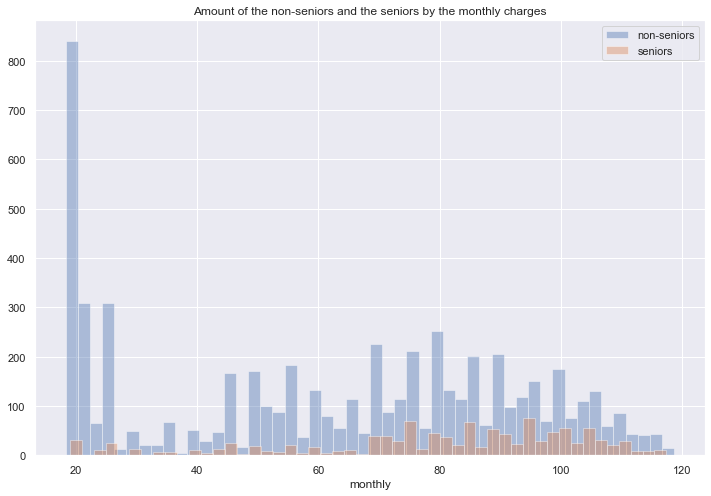

In [72]:
plt.figure(figsize=(12, 8))
plt.title('Amount of the non-seniors and the seniors by the monthly charges')

sns.distplot(df_contract.monthly[df_personal.senior == 0], kde=False, bins=50)
sns.distplot(df_contract.monthly[df_personal.senior == 1], kde=False, bins=50)

plt.legend(['non-seniors', 'seniors'])
plt.show()

Видно, что пожилые клиенты платят выше среднего. Денег же у них обычно меньше, чем у молодых. Скорее всего, пожилые уходят из компании в надежде сэкономить. При этом почти никто из пожилых не платит по минимуму (левый выброс - только для *non-senior*). Получившийся парадокс несколько объясняется пониманием того факта, что пожилым людям по понятным причинам бывает затруднительно перейти с тарифа на тариф, и они пользуются тем, что есть (точнее, что было на момент заключения договора).

Чтобы уменьшить отток пожилых клиентов, возможно, будет целесообразнее предлагать им при заключении договора менее дорогостоящий тариф и минимизировать предложение дополнительных услуг.

##### Семейное положение
Клиенты, не состоящие в браке, уходят из компании в полтора раза чаще, чем состоящие (33,0 против 19,7%).

##### Наличие лиц на иждивении
Клиенты, не имеющие лиц на иждивении, уходят из компании вдвое чаще, чем имеющие (31,3 против 15,5%).

## Влияние использования дополнительных услуг (интернет)

### Категориальные признаки

В таблице *df_internet* имеются только категориальные признаки.

Исследуем эти признаки так же, как в предыдущем подразделе.

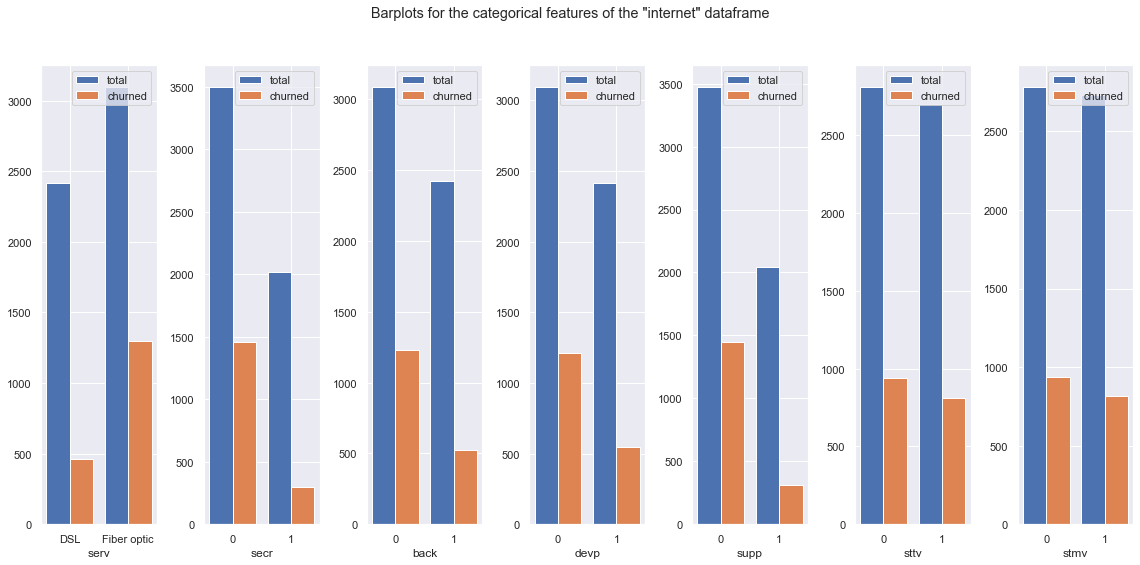


serv:


,total,total (ratio),churned,churned (ratio)
DSL,2416,43.8,459,19.0
Fiber optic,3096,56.2,1297,41.9



secr:


,total,total (ratio),churned,churned (ratio)
0,3497,63.4,1461,41.8
1,2015,36.6,295,14.6



back:


,total,total (ratio),churned,churned (ratio)
1,2425,44.0,523,21.6
0,3087,56.0,1233,39.9



devp:


,total,total (ratio),churned,churned (ratio)
0,3094,56.1,1211,39.1
1,2418,43.9,545,22.5



supp:


,total,total (ratio),churned,churned (ratio)
0,3472,63.0,1446,41.6
1,2040,37.0,310,15.2



sttv:


,total,total (ratio),churned,churned (ratio)
0,2809,51.0,942,33.5
1,2703,49.0,814,30.1



stmv:


,total,total (ratio),churned,churned (ratio)
0,2781,50.5,938,33.7
1,2731,49.5,818,30.0


In [73]:
cat_list = ['serv', 'secr', 'back', 'devp', 'supp', 'sttv', 'stmv']

plots(df_internet, features_list=cat_list, tick_rotation=False)

Дополнительные услуги, связанные с доступом в Интернет, можно разделить на три группы.
1. Технология подключения к Интернету. В эту группу входит только *serv*. Это даже не дополнительная услуга, а характеристика основной: от выбранной технологии зависит скорость доступа, необходимое оборудование, цена. У каждой есть свои плюсы и минусы.
2. Сервисные и вспомогательные услуги. Сюда входят: блокировка небезопасных сайтов (secr); облачное хранилище для резервного копирования (back), антивирус (devp), техническая поддержка (supp). Далеко не каждый пользователь ощущает потребность в этих услугах.
3. Доступ к развлекательному контенту. К этой группе относятся: стриминговое телевидение (sttv), каталог фильмов (stmv). Эти услуги востребованы у самого широкого круга пользователей.

С точки зрения оттока клиентов признаки внутри каждой из групп проявляют себя схожим образом. Поэтому можно рассмотреть эти группы целиком.

##### Технология подключения к Интернету
Оптоволокно - более современная технология (с точки зрения потребительского рынка), чем DSL, и её предпочитают 56,2% клиентов. Вероятно, для конкурентов эта технология также представляется более перспективной: они тоже борются за клиента. В результате мы видим вдвое больший отток: 41,9% клиентов, использующих оптоволокно, против 19%, использующих DSL, ушли из компании.

##### Сервисные и вспомогательные услуги
Отток среди клиентов, пользующихся сервисными услугами, примерно вдвое ниже (~15...20 против ~40%), чем у остальных. Здесь причина, скорее всего, - в самих клиентах. Если клиент чётко осознаёт необходимость подключения сервисной услуги, за которую он готов регулярно платить деньги, то, вероятно, и основной пакет услуг (да и компанию в целом) он выбирал более тщательно и всё просчитал заранее.

##### Доступ к развлекательному контенту
Развлекательный контент хотят потреблять самые разные люди: круг клиентов - широчайший. Поэтому мы видим здесь примерно одинаковые цифры. Количество клиентов, подключивших / не подключивших стриминговое телевидение / каталог фильмов - почти равное (друг другу). Одинаков и отток по каждой из услуг: ~33,6% среди тех, кто не подключал такие услуги, и ~30,1% - среди пользующихся. Клиенты, оплачивающие доступ к развлекательному контенту, уходят из компании реже (на 10% или 3,5 процентных пункта), и обусловлено это теми же причинами, что и по сервисным услугам (см. выше).

## Влияние использования дополнительных услуг (телефон)

### Категориальные признаки

В таблице *df_phone* имеется только один категориальный признак.

Исследуем этот признак так же при помощи диаграммы.

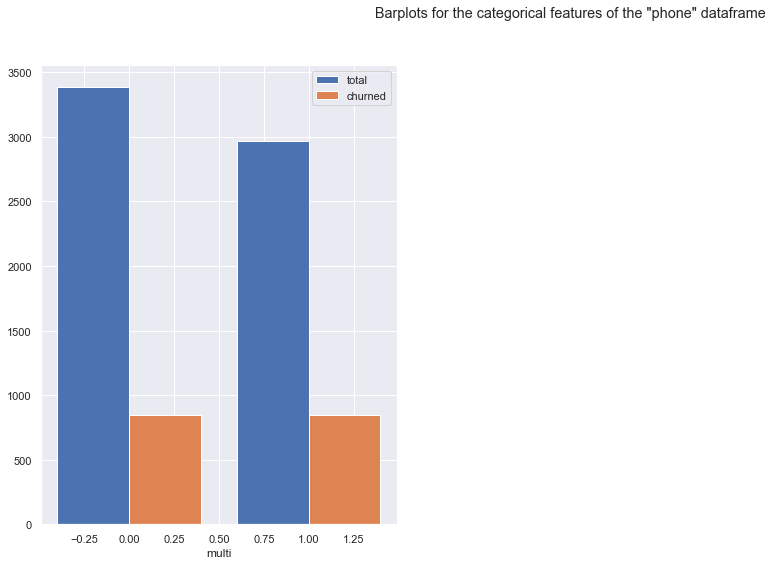


multi:


,total,total (ratio),churned,churned (ratio)
0,3385,53.3,849,25.1
1,2967,46.7,850,28.6


In [74]:
cat_list = ['multi']

plots(df_phone, features_list=cat_list, tick_rotation=False)

##### Многоканальный телефон
Многоканальный телефон использует 46,7% клиентов, а отток среди них составляет 28,6%. Отток среди клиентов, использующих одноканальный телефон, - 25,1%: немного меньше, но сопоставимо. Можно сказать, что использование многоканального телефона - фактор, как минимум, не определяющий: отток клиентов с ним почти не связан.

## Выводы по исследовательскому анализу данных

В каждую таблицу добавлен столбец *churn*. Это - бинарный признак, отражающий факт ухода клиента из компании. Признак *churn* является целевым признаком.

В таблицу *df_contract* добавлен столбец *duration*, отражающий длительность пребывания клиента в компании.

Исследованы связи всех признаков с целевым признаком. В целом, результаты - ожидаемые: то, что должно влиять на отток, - влияет, а то, что не должно, - практически не влияет. Каких-либо необъяснимых явлений, аномалий не было выявлено.

Данные теперь стали более понятными и прозрачными. Это должно помочь построить более эффективные ML-модели и, в идеале, сократить время на их разработку.

# Построение моделей машинного обучения

## Подготовительная часть

### План работы

Составим план исследования.

*План корректировался в процессе работы и представлен в финальной версии.*

#### Подготовка данных
* Удалить ненужные признаки.
* Объединить таблицы - создать одну общую таблицу.
* Проверить признаки на корреляцию.
* Выполнить кодирование категориальных признаков.
* Сформировать обучающую и тестовую выборки.(\*) При разделении датасета на выборки будем придерживаться пропорции 3:1:1 (обучающая-валидационная-тестовая):
    * соотношение размеров обучающей и тестовой выборок - 4:1;
    * при кросс-валидации будем делить обучающую выборку на 4 части (*cv*=4) - в соотношении 3:1.
* Выполнить масштабирование количественных признаков.(\*)

#### Разработка моделей
* Одиночные модели. Выполним обучение "в лоб": модель обучается на целой таблице (суффикс *_single*).
* Стратифицированные модели. Создадим несколько моделей, каждая из которых оптимизирована под определённый набор признаков. Набор признаков, в свою очередь, зависит от того, чем пользуется клиент: интернет, телефон или обе услуги сразу (суффикс *_strat*).
* Двухуровневые модели. Вероятности, рассчитанные моделями первого уровня, внесём в таблицу как признаки. Построим модель второго уровня, которая будет учитывать как непосредственно сами данные, так и вероятности, рассчитанные несколькими разными (на основе различных алгоритмов) моделями первого уровня. Также построим такую модель, которая будет учитывать только вероятности, но не данные (суффикс *_double*).

#### Тестирование моделей
* Протестируем на тестовой выборке лучшие модели. Тестировать будем каждую лучшую модель сразу же после её нахождения, - не в отдельном разделе.

(\*) - Поскольку для различных моделей могут различаться выборки (разный набор признаков, разные срезы объектов и т.п.), формирование выборок и последующее масштабирование количественных признаков будут осуществляться в разделе "Разработка моделей" индивидуально под каждую задачу (каждый подпункт плана).

### Применяемые алгоритмы

Будем строить модели на основе следующих алгоритмов:
* Random Forest;
* Logistic Regression;
* LightGBM.

Процедуры подготовки признаков реализованы в классе *preparing*.

Процедуры обучения (с применением кросс-валидации) и тестирования реализованы в классе *modelling*.

### Подготовка среды

Импортируем необходимые библиотеки.

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

from sklearn.metrics import roc_auc_score, recall_score, confusion_matrix, accuracy_score

Настроим среду.

In [76]:
pd.set_option('display.max_columns', None)
r_state = 123

cv = 4
test_ratio = 0.2

# The list for collecting all the results
modelling_results = []

## Классы, функции

In [77]:
class preparing:
    'The class implements splitting and scaling the data'
    
    # Initializing of the class
    def __init__(self, X, y, numeric,
                 test_ratio=test_ratio,
                 random_state=r_state):
        self.X = X
        self.y = y
        self.numeric = numeric
        self.test_ratio = test_ratio
        self.random_state = random_state
    
    # Splitting the data into train and test samples
    def split(self):
        self.X_train, self.X_test, self.y_train, self.y_test = \
            train_test_split(self.X,
                             self.y,
                             test_size=self.test_ratio,
                             stratify=self.y,
                             random_state=self.random_state)
    
    # Scaling numerical features
    def scale(self):
        scaler = StandardScaler()
        scaler.fit(self.X_train[self.numeric])
        self.X_train[self.numeric] = scaler.transform(self.X_train[self.numeric])
        self.X_test[self.numeric]  = scaler.transform(self.X_test[self.numeric])
    
    # Returning the samples
    def get_samples(self):
        return (self.X_train, self.X_test, self.y_train, self.y_test)
    
    # Implementing the full pipeline of the class
    def pipeline(self):
        self.split()
        self.scale()

In [78]:
class modelling:
    'The class implements training and testing of the model and outputs the results'
    
    # Initializing of the class
    def __init__(self, samples, model, grid,
                 cv=cv,
                 random_state=r_state,
                 n_iter=20):
        self.X_train = samples[0]
        self.X_test  = samples[1]
        self.y_train = samples[2]
        self.y_test  = samples[3]
        self.model = model
        self.grid = grid
        self.cv = cv
        self.random_state = random_state
        self.n_iter = n_iter
        
    # Searching the best model applying cross-validation and, finally, training it
    def fit(self):
        clf = RandomizedSearchCV(self.model,
                                 self.grid,
                                 n_iter=self.n_iter,
                                 scoring='roc_auc',
                                 n_jobs=-1,
                                 cv=self.cv,
                                 random_state=self.random_state
                                )
        search = clf.fit(self.X_train, self.y_train)
        self.model_best_params = search.best_params_
        self.model_best = search.best_estimator_
        self.model_best.fit(self.X_train, self.y_train)
    
    # Computing the predictions for train and test samples
    def predict(self):
        self.y_pred_train = self.model_best.predict(self.X_train)
        self.y_pred_test  = self.model_best.predict(self.X_test)
        self.y_pred_proba_train = self.model_best.predict_proba(self.X_train)
        self.y_pred_proba_test  = self.model_best.predict_proba(self.X_test)
    
    # Displaying the results
    def results(self, short=False):
        if short == False:
            self.metrics_train = results_func(self.y_train, self.y_pred_train, self.y_pred_proba_train,
                                              'train', short=short)
            self.metrics_test  = results_func(self.y_test, self.y_pred_test, self.y_pred_proba_test,
                                              'test', short=short)
            print(f'=== best parameters ===\n{self.model_best_params}\n')
        else:
            self.metrics_test  = results_func(self.y_test, self.y_pred_test, self.y_pred_proba_test,
                                              'test', short=short)
    
    # Returning the results
    def get_results(self, model_name, sample_name='test'):
        return get_results_func(model_name=model_name,
                                metrics_train=self.metrics_train,
                                metrics_test=self.metrics_test,
                                sample_name=sample_name)
    
    
    # Returning the best model
    def get_best_model(self):
        return self.model_best
    
    # Returning the predictions or the probabilities
    def get_answers(self, code):
        answer_dict = {
            'pred_train' : pd.Series(data=self.y_pred_train, index=self.y_train.index),
            'pred_test'  : pd.Series(data=self.y_pred_test,  index=self.y_test.index),
            'proba_train': pd.DataFrame(data=self.y_pred_proba_train, index=self.y_train.index, columns=['zero', 'one']),
            'proba_test' : pd.DataFrame(data=self.y_pred_proba_test,  index=self.y_test.index, columns=['zero', 'one'])
        }
        return answer_dict[code]
    
    # Implementing "fit" and "predict" methods one by one
    def fit_predict(self):
        self.fit()
        self.predict()

In [79]:
# Returning the results

def get_results_func(model_name, metrics_train=None, metrics_test=None, sample_name='test'):
    results_list = [model_name]
    if sample_name == 'train':
        results_list.extend(np.around(metrics_train, 3))
    elif sample_name == 'test':
        results_list.extend(np.around(metrics_test, 3))
    elif sample_name == 'all':
        results_list.extend((*np.around(metrics_test, 3), *np.around(metrics_train, 3)))
    else:
        None
    return results_list

In [80]:
# The function displays the results of training and testing a model

def results_func(y, y_pred, y_pred_proba, sample_name, short):
    roc_auc = roc_auc_score(y, y_pred_proba[:, 1])
    recall  = recall_score(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    ac_const = accuracy_score(y, np.zeros_like(y_pred))
    
    print('=== {} sample ===\nROC-AUC:  {:.3f}\nRecall:   {:.3f}\nAccuracy: {:.3f}\nAc.const: {:.3f}'
          .format(sample_name, roc_auc, recall, accuracy, ac_const))
    
    if short == False:
        d(pd.DataFrame(data=confusion_matrix(y, y_pred),
                       index=['neg class', 'pos class'],
                       columns=['neg prediction', 'pos prediction']
                      )
         )
    print('')
    
    return roc_auc, recall, accuracy, ac_const

In [81]:
# The function combines the arrays of answers and calculates the resulting metrics

def combine_metrics(modelling_obj, model_name, short=False, sample_name='test'):
    y_train = pd.Series()
    y_test  = pd.Series()
    y_pred_train = pd.Series()
    y_pred_test  = pd.Series()
    y_pred_proba_train = pd.DataFrame()
    y_pred_proba_test  = pd.DataFrame()
    
    for obj in modelling_obj:
        y_train = pd.concat([y_train, obj.y_train])
        y_test  = pd.concat([y_test, obj.y_test])
        y_pred_train = pd.concat([y_pred_train, obj.get_answers('pred_train')])
        y_pred_test  = pd.concat([y_pred_test, obj.get_answers('pred_test')])
        y_pred_proba_train = pd.concat([y_pred_proba_train, obj.get_answers('proba_train')])
        y_pred_proba_test  = pd.concat([y_pred_proba_test, obj.get_answers('proba_test')])

    y_train.sort_index(inplace=True)
    y_test.sort_index(inplace=True)
    y_pred_train.sort_index(inplace=True)
    y_pred_test.sort_index(inplace=True)
    y_pred_proba_train.sort_index(inplace=True)
    y_pred_proba_test.sort_index(inplace=True)
    
    metrics_train = results_func(y_train.values, y_pred_train.values, y_pred_proba_train.values, 'train', short=short)
    metrics_test  = results_func(y_test.values, y_pred_test.values, y_pred_proba_test.values, 'test', short=short)

    return get_results_func(model_name=model_name,
                            metrics_train=metrics_train,
                            metrics_test=metrics_test,
                            sample_name=sample_name)

In [82]:
# The function forms the dataframe with probabilities computed with the single models

def df_proba_single(code):
    df_proba = modelling_single_rf.get_answers(code).copy()
    
    df_proba = df_proba.merge(modelling_single_lr.get_answers(code),
                                      how='outer', left_index=True, right_index=True, suffixes=('_rf', '_lr'))
    
    df_proba = df_proba.merge(modelling_single_lg.get_answers(code),
                                      how='outer', left_index=True, right_index=True)
    
    df_proba.rename(columns={'zero': 'zero_lg', 'one': 'one_lg'}, inplace=True)
    
    return df_proba

## Подготовка данных

### Просмотр данных

Просмотрим ещё раз первые строки таблиц.

In [83]:
d(df_contract.head(3))
d(df_personal.head(3))
d(df_internet.head(3))
d(df_phone.head(3))

,begin,end,type,paperless,payment,monthly,total,churn,duration
id,,,,,,,,,
7590-VHVEG,2020-01-01,NaT,Month-to-month,1,Electronic check,29.85,29.85,0,31
5575-GNVDE,2017-04-01,NaT,One year,0,Mailed check,56.95,1889.50,0,1036
3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,53.85,108.15,1,61


,gender,senior,partner,dependents,churn
id,,,,,
7590-VHVEG,Female,0,1,0,0
5575-GNVDE,Male,0,0,0,0
3668-QPYBK,Male,0,0,0,1


,serv,secr,back,devp,supp,sttv,stmv,churn
id,,,,,,,,
7590-VHVEG,DSL,0,1,0,0,0,0,0
5575-GNVDE,DSL,1,0,1,0,0,0,0
3668-QPYBK,DSL,1,1,0,0,0,0,1


,multi,churn
id,,
5575-GNVDE,0,0
3668-QPYBK,0,1
9237-HQITU,0,1


###  Удаление ненужных признаков

Признаки, которые не нужны, - *begin* и *end* из таблицы *df_contract*.

Информация из этих признаков, которая нужна нам, содержится в признаке *duration*. Кроме того, признак *end* даёт утечку целевого признака.

Удалим признаки.

In [84]:
df_contract.drop(columns=['begin', 'end'], inplace=True)
df_contract.head(3)

,type,paperless,payment,monthly,total,churn,duration
id,,,,,,,
7590-VHVEG,Month-to-month,1,Electronic check,29.85,29.85,0,31
5575-GNVDE,One year,0,Mailed check,56.95,1889.50,0,1036
3668-QPYBK,Month-to-month,1,Mailed check,53.85,108.15,1,61


Здесь же заодно преобразуем в числа оставшиеся два бинарных признака со строковыми значениями: *gender*, *serv*.

In [85]:
df_personal.gender = yes_no_convert(df_personal.gender, true='Male', false='Female')

1    3549
0    3483
Name: gender, dtype: int64

In [86]:
df_internet.serv = yes_no_convert(df_internet.serv, true='Fiber optic', false='DSL')

1    3096
0    2416
Name: serv, dtype: int64

### Объединение таблиц

#### Объединение

Объединим все четыре таблицы в одну общую по индексу.

In [87]:
df_full = df_contract.merge(df_personal[['gender', 'senior', 'partner' ,'dependents']],
                            on='id',
                            how='outer'
                           )

df_full = df_full.merge(df_internet[['serv', 'secr', 'back', 'devp', 'supp', 'sttv', 'stmv']],
                        on='id',
                        how='outer'
                       )

df_full = df_full.merge(df_phone[['multi']],
                        on='id',
                        how='outer'
                       )

df_full.head()

,type,paperless,payment,monthly,total,churn,duration,gender,senior,partner,dependents,serv,secr,back,devp,supp,sttv,stmv,multi
id,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,1,Electronic check,29.85,29.85,0,31,0,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
5575-GNVDE,One year,0,Mailed check,56.95,1889.50,0,1036,1,0,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3668-QPYBK,Month-to-month,1,Mailed check,53.85,108.15,1,61,1,0,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7795-CFOCW,One year,0,Bank transfer (automatic),42.30,1840.75,0,1371,1,0,0,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,NaN
9237-HQITU,Month-to-month,1,Electronic check,70.70,151.65,1,61,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Добавление вспомогательных признаков

Добавим признаки, обозначающие факт пользования услугами "Интернет" и "Телефон".

In [88]:
df_full['internet'] = 0
df_full.loc[df_internet.index, 'internet'] = 1

df_full['phone'] = 0
df_full.loc[df_phone.index, 'phone'] = 1

df_full.head(3)

,type,paperless,payment,monthly,total,churn,duration,gender,senior,partner,dependents,serv,secr,back,devp,supp,sttv,stmv,multi,internet,phone
id,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,1,Electronic check,29.85,29.85,0,31,0,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,1,0
5575-GNVDE,One year,0,Mailed check,56.95,1889.50,0,1036,1,0,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1
3668-QPYBK,Month-to-month,1,Mailed check,53.85,108.15,1,61,1,0,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1


In [89]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
type          7032 non-null object
paperless     7032 non-null int32
payment       7032 non-null object
monthly       7032 non-null float64
total         7032 non-null float64
churn         7032 non-null int32
duration      7032 non-null int64
gender        7032 non-null int32
senior        7032 non-null int32
partner       7032 non-null int32
dependents    7032 non-null int32
serv          5512 non-null float64
secr          5512 non-null float64
back          5512 non-null float64
devp          5512 non-null float64
supp          5512 non-null float64
sttv          5512 non-null float64
stmv          5512 non-null float64
multi         6352 non-null float64
internet      7032 non-null int64
phone         7032 non-null int64
dtypes: float64(10), int32(6), int64(3), object(2)
memory usage: 1.3+ MB


#### Заполнение пропусков и приведение типов

Пропуски заполним нулями. Добавленные выше признаки (*internet* и *phone*) должны влиять на значимость признаков, отражающих использование дополнительных услуг: снижать значимость, если основная услуга (интернет, телефон) не используется, и - наоборот. Ноль - "доп. услуга не подключена" - наиболее логичное заполнение при условии, что мы хотим остаться в бинарных рамках.

Заполним пропуски и приведём типы данных.

In [90]:
df_full.fillna(0, inplace=True)
df_full[['serv', 'secr', 'back', 'devp', 'supp', 'sttv', 'stmv', 'multi']] = \
    df_full[['serv', 'secr', 'back', 'devp', 'supp', 'sttv', 'stmv', 'multi']].astype('int')

df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
type          7032 non-null object
paperless     7032 non-null int32
payment       7032 non-null object
monthly       7032 non-null float64
total         7032 non-null float64
churn         7032 non-null int32
duration      7032 non-null int64
gender        7032 non-null int32
senior        7032 non-null int32
partner       7032 non-null int32
dependents    7032 non-null int32
serv          7032 non-null int32
secr          7032 non-null int32
back          7032 non-null int32
devp          7032 non-null int32
supp          7032 non-null int32
sttv          7032 non-null int32
stmv          7032 non-null int32
multi         7032 non-null int32
internet      7032 non-null int64
phone         7032 non-null int64
dtypes: float64(2), int32(14), int64(3), object(2)
memory usage: 1.1+ MB


#### Списки признаков

Создадим списки категориальных и количественных признаков.

In [91]:
numeric = ['monthly', 'total', 'duration']
categorical = ['type', 'paperless', 'payment', 'churn', 'gender', 'senior', 'partner', 'dependents',
               'serv', 'secr', 'back', 'devp', 'supp', 'sttv', 'stmv', 'multi', 'internet', 'phone', 'serv']
nonbinary = ['type', 'payment']

### Проверка признаков на наличие корреляции

Необходимо убедиться в отсутствии сильной связи между количественными признаками.

In [92]:
df_full[numeric].corr()

,monthly,total,duration
monthly,1.000000,0.651065,0.246715
total,0.651065,1.000000,0.825811
duration,0.246715,0.825811,1.000000


Имеется заметная связь между *total* и *monthly*; сильная связь между *total* и *duration*; слабая связь между *monthly* и *duration*.

Таким образом, признак *total* следует удалить. Удалим его сразу из всех таблиц.

In [93]:
df_full.drop(columns=['total'], inplace=True)
df_contract.drop(columns=['total'], inplace=True)

numeric.remove('total')

### Кодирование категориальных признаков

В таблице имеются небинарные категориальные признаки. Преобразуем их в численные (бинарные по количеству категорий) методом прямого кодирования (OHE - One-Hot Encoding).

Выполним OHE-кодирование.

In [94]:
df_full = pd.get_dummies(df_full, drop_first=True)
df_full.head(3)

,paperless,monthly,churn,duration,gender,senior,partner,dependents,serv,secr,back,devp,supp,sttv,stmv,multi,internet,phone,type_One year,type_Two year,payment_Credit card (automatic),payment_Electronic check,payment_Mailed check
id,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,29.85,0,31,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
5575-GNVDE,0,56.95,0,1036,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,0,1
3668-QPYBK,1,53.85,1,61,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1


Переименуем новые столбцы.

In [95]:
df_full.rename(columns={'type_One year': 'type_one_year',
                        'type_Two year': 'type_two_year',
                        'payment_Credit card (automatic)': 'payment_card',
                        'payment_Electronic check': 'payment_electronic',
                        'payment_Mailed check': 'payment_mailed'
                       },
               inplace=True
              )

df_full.head(3)

,paperless,monthly,churn,duration,gender,senior,partner,dependents,serv,secr,back,devp,supp,sttv,stmv,multi,internet,phone,type_one_year,type_two_year,payment_card,payment_electronic,payment_mailed
id,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,29.85,0,31,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
5575-GNVDE,0,56.95,0,1036,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,0,1
3668-QPYBK,1,53.85,1,61,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1


### Выделение целевого признака

Выделим целевой признак в отдельный объект.

In [96]:
X = df_full.drop(columns=['churn']).reset_index(drop=True)
y = df_full.churn.reset_index(drop=True)

## Разработка моделей

### Инициализация моделей и сеток гиперпараметров

#### *Random Forest*

In [97]:
grid_rf = {
    'n_estimators': np.linspace(8, 15, num=8, dtype='int') * 10,
    'max_depth': np.geomspace(4, 16, num=6, dtype='int'),
    'min_samples_split': np.geomspace(2, 16, num=6, dtype='int')
}

grid_rf

{'n_estimators': array([ 80,  90, 100, 110, 120, 130, 140, 150]),
 'max_depth': array([ 4,  5,  6,  9, 12, 16]),
 'min_samples_split': array([ 2,  3,  4,  6, 10, 16])}

In [98]:
model_rf = RandomForestClassifier(n_jobs=-1,
                                  random_state=r_state,
                                  warm_start=True,
                                  class_weight='balanced'
                                 )

#### *Logistic Regression*

In [99]:
grid_lr = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid_lr

{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [100]:
model_lr = LogisticRegression(n_jobs=-1,
                              random_state=r_state,
                              warm_start=True,
                              class_weight='balanced'
                             )

#### *LightGBM*

In [101]:
grid_lg = {
    'max_depth': np.geomspace(6, 12, num=3, dtype='int'),
    'num_leaves': np.geomspace(2**2, 2**5, num=5, dtype='int'),
    'max_bin': np.geomspace(2**8, 2**9, num=3, dtype='int')
}

grid_lg

{'max_depth': array([ 6,  8, 12]),
 'num_leaves': array([ 4,  6, 11, 19, 32]),
 'max_bin': array([256, 362, 512])}

In [102]:
model_lg = lgb.LGBMClassifier(n_jobs=-1,
                              random_state=r_state,
                              class_weight='balanced',
                              learning_rate=0.025,
                              num_iterations=400
                             )

### Одиночные модели

#### Формирование обучающей и тестовой выборок

Чтобы сформировать выборки для одиночных моделей, достаточно разделить выборки *X* и *y* на две части в соотношении 4:1. При этом необходимо сохранить соотношение классов целевого признака.

Разделим выборки.

In [103]:
preparing_single = preparing(X, y, numeric)
preparing_single.split()

#### Масштабирование количественных признаков

Различающийся масштаб (порядок) и разброс значений количественных признаков может повлечь разную значимость этих признаков для модели (чем больше значения, тем выше значимость). Искажение значимости негативно влияет на обучение.

Решить проблему поможет масштабирование количественных признаков - приведение значений к одному масштабу.

Посмотрим, насколько различаются признаки *monthly* и *duration*.

In [104]:
X[numeric].describe()

,monthly,duration
count,7032.000000,7032.000000
mean,64.798208,987.538538
std,30.085974,747.153663
min,18.250000,30.000000
25%,35.587500,275.000000
50%,70.350000,883.000000
75%,89.862500,1676.000000
max,118.750000,2191.000000


Значения различаются примерно на порядок. Масштабирование в этом случае не столь критично (критично, когда 3-4 порядка и более), но если мы его сделаем, - хуже не будет.

Выполним масштабирование.

In [105]:
preparing_single.scale()

In [106]:
d(preparing_single.get_samples()[0].head(3)) # X_train
d(preparing_single.get_samples()[1].head(3)) # X_test

,paperless,monthly,duration,gender,senior,partner,dependents,serv,secr,back,devp,supp,sttv,stmv,multi,internet,phone,type_one_year,type_two_year,payment_card,payment_electronic,payment_mailed
6408,1,0.424463,0.755418,0,1,1,0,1,1,0,0,0,0,0,1,1,1,0,0,0,1,0
5593,1,0.515972,-1.071719,1,0,0,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,1
3132,1,1.475974,0.349388,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0


,paperless,monthly,duration,gender,senior,partner,dependents,serv,secr,back,devp,supp,sttv,stmv,multi,internet,phone,type_one_year,type_two_year,payment_card,payment_electronic,payment_mailed
3238,1,-0.833357,-0.542811,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
6290,1,0.539264,0.798158,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,1,0,0,0
6111,0,-0.176162,-1.071719,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0


#### *Random Forest*

Обучим модели с применением кросс-валидации. Меняя значения гиперпараметров, найдём лучшую модель. Затем лучшую модель протестируем и выведем результат.

In [107]:
%%time

modelling_single_rf = modelling(preparing_single.get_samples(), model_rf, grid_rf)
modelling_single_rf.fit_predict()
modelling_single_rf.results()
modelling_results.append(modelling_single_rf.get_results('single_rf'))

=== train sample ===
ROC-AUC:  0.936
Recall:   0.859
Accuracy: 0.846
Ac.const: 0.734


,neg prediction,pos prediction
neg class,3474,656
pos class,211,1284



=== test sample ===
ROC-AUC:  0.850
Recall:   0.733
Accuracy: 0.783
Ac.const: 0.734


,neg prediction,pos prediction
neg class,828,205
pos class,100,274



=== best parameters ===
{'n_estimators': 130, 'min_samples_split': 16, 'max_depth': 12}

Wall time: 24.1 s


#### *Logistic Regression*

In [108]:
%%time

modelling_single_lr = modelling(preparing_single.get_samples(), model_lr, grid_lr)
modelling_single_lr.fit_predict()
modelling_single_lr.results()
modelling_results.append(modelling_single_lr.get_results('single_lr'))

=== train sample ===
ROC-AUC:  0.847
Recall:   0.797
Accuracy: 0.751
Ac.const: 0.734


,neg prediction,pos prediction
neg class,3033,1097
pos class,304,1191



=== test sample ===
ROC-AUC:  0.838
Recall:   0.783
Accuracy: 0.756
Ac.const: 0.734


,neg prediction,pos prediction
neg class,770,263
pos class,81,293



=== best parameters ===
{'solver': 'sag'}

Wall time: 1.11 s


#### *LightGBM*

In [109]:
%%time

modelling_single_lg = modelling(preparing_single.get_samples(), model_lg, grid_lg)
modelling_single_lg.fit_predict()
modelling_single_lg.results()
modelling_results.append(modelling_single_lg.get_results('single_lg'))

=== train sample ===
ROC-AUC:  0.968
Recall:   0.936
Accuracy: 0.889
Ac.const: 0.734


,neg prediction,pos prediction
neg class,3598,532
pos class,95,1400



=== test sample ===
ROC-AUC:  0.888
Recall:   0.783
Accuracy: 0.818
Ac.const: 0.734


,neg prediction,pos prediction
neg class,858,175
pos class,81,293



=== best parameters ===
{'num_leaves': 32, 'max_depth': 8, 'max_bin': 362}

Wall time: 12.9 s


#### Вывод

Одиночные модели можно принять за отправную точку, baseline, так как они показали неплохие результаты и при этом являются самыми простыми.

Лучшая модель - на основе алгоритма *LightGBM*. Значение целевой метрики: *ROC-AUC* = 0,888. Модель - адекватна (*Accuracy* = 0,818 против 0,734 у константной модели) и обеспечивает хороший охват (*Recall* = 0,783): выявила 293 клиента, желающих уйти, и 81 - "просмотрела"; при этом 175 клиентов получат бонусы от компании "просто так" (они на самом деле не желают уходить). Тем не менее, согласно ТЗ, полнота - важнее, чем точность, поэтому на раздачу "лишних" бонусов можно в данном случае закрыть глаза.

### Стратифицированные модели - итерация 1

#### Формирование выборок

Для начала перечислим группы, на которые мы будем разделять пользователей. Их всего может быть четыре:
* пользуются интернетом и телефоном;
* пользуются только интернетом;
* пользуются только телефоном;
* не пользуются ни интернетом, ни телефоном.

Узнаем, какова численность каждой из этих групп.

In [110]:
X.pivot_table(index=['internet', 'phone'], values='monthly', aggfunc='count')

monthly
internet phone         
0        1         1520
1        0          680
         1         4832

Клиентов, которые не пользуются  ни интернетом, ни телефоном, не оказалось ни одного. Остаются три группы:
* пользуются интернетом и телефоном;
* пользуются только интернетом;
* пользуются только телефоном.

Сформируем стратифицированные выборки. Суффикс соответствует сочетанию классов в мультииндексе сводной таблицы выше.

In [111]:
X_01 = X[(X.internet == 0) & (X.phone == 1)]
X_10 = X[(X.internet == 1) & (X.phone == 0)]
X_11 = X[(X.internet == 1) & (X.phone == 1)]

y_01 = y[X_01.index]
y_10 = y[X_10.index]
y_11 = y[X_11.index]

X_01.drop(columns=['serv', 'secr', 'back', 'devp', 'supp', 'sttv', 'stmv'], inplace=True)
X_10.drop(columns=['multi'], inplace=True)

Разделим полученные выборки на обучающие и тестовые. Затем отмасштабируем количественные признаки. Всё это можно сделать сразу при помощи метода *pipeline*.

In [112]:
preparing_strat_01 = preparing(X_01, y_01, numeric)
preparing_strat_01.pipeline()

preparing_strat_10 = preparing(X_10, y_10, numeric)
preparing_strat_10.pipeline()

preparing_strat_11 = preparing(X_11, y_11, numeric)
preparing_strat_11.pipeline()

#### *Random Forest*

In [113]:
%%time

modelling_strat_01_rf = modelling(preparing_strat_01.get_samples(), model_rf, grid_rf)
modelling_strat_01_rf.fit_predict()
modelling_strat_01_rf.results(short=True)

=== test sample ===
ROC-AUC:  0.900
Recall:   0.783
Accuracy: 0.806
Ac.const: 0.924

Wall time: 5.91 s


In [114]:
%%time

modelling_strat_10_rf = modelling(preparing_strat_10.get_samples(), model_rf, grid_rf)
modelling_strat_10_rf.fit_predict()
modelling_strat_10_rf.results(short=True)

=== test sample ===
ROC-AUC:  0.845
Recall:   0.735
Accuracy: 0.728
Ac.const: 0.750

Wall time: 5.61 s


In [115]:
%%time

modelling_strat_11_rf = modelling(preparing_strat_11.get_samples(), model_rf, grid_rf)
modelling_strat_11_rf.fit_predict()
modelling_strat_11_rf.results(short=True)

=== test sample ===
ROC-AUC:  0.818
Recall:   0.726
Accuracy: 0.755
Ac.const: 0.672

Wall time: 7.86 s


Рассчитаем метрики по всей совокупности данных.

In [116]:
modelling_results.append(combine_metrics([modelling_strat_01_rf, modelling_strat_10_rf, modelling_strat_11_rf],
                                         model_name='strat_iter1_rf'
                                        )
                        )

=== train sample ===
ROC-AUC:  0.918
Recall:   0.855
Accuracy: 0.821
Ac.const: 0.734


,neg prediction,pos prediction
neg class,3338,792
pos class,217,1278



=== test sample ===
ROC-AUC:  0.831
Recall:   0.730
Accuracy: 0.763
Ac.const: 0.734


,neg prediction,pos prediction
neg class,801,232
pos class,101,273


#### *Logistic Regression*

In [117]:
%%time

modelling_strat_01_lr = modelling(preparing_strat_01.get_samples(), model_lr, grid_lr)
modelling_strat_01_lr.fit_predict()
modelling_strat_01_lr.results(short=True)

=== test sample ===
ROC-AUC:  0.885
Recall:   0.913
Accuracy: 0.717
Ac.const: 0.924

Wall time: 640 ms


In [118]:
%%time

modelling_strat_10_lr = modelling(preparing_strat_10.get_samples(), model_lr, grid_lr)
modelling_strat_10_lr.fit_predict()
modelling_strat_10_lr.results(short=True)

=== test sample ===
ROC-AUC:  0.828
Recall:   0.706
Accuracy: 0.721
Ac.const: 0.750

Wall time: 640 ms


In [119]:
%%time

modelling_strat_11_lr = modelling(preparing_strat_11.get_samples(), model_lr, grid_lr)
modelling_strat_11_lr.fit_predict()
modelling_strat_11_lr.results(short=True)

=== test sample ===
ROC-AUC:  0.808
Recall:   0.782
Accuracy: 0.722
Ac.const: 0.672

Wall time: 544 ms


In [120]:
modelling_results.append(combine_metrics([modelling_strat_01_lr, modelling_strat_10_lr, modelling_strat_11_lr],
                                         model_name='strat_iter1_lr'
                                        )
                        )

=== train sample ===
ROC-AUC:  0.827
Recall:   0.789
Accuracy: 0.730
Ac.const: 0.734


,neg prediction,pos prediction
neg class,2927,1203
pos class,315,1180



=== test sample ===
ROC-AUC:  0.818
Recall:   0.783
Accuracy: 0.721
Ac.const: 0.734


,neg prediction,pos prediction
neg class,721,312
pos class,81,293


#### *LightGBM*

In [121]:
%%time

modelling_strat_01_lg = modelling(preparing_strat_01.get_samples(), model_lg, grid_lg)
modelling_strat_01_lg.fit_predict()
modelling_strat_01_lg.results(short=True)

=== test sample ===
ROC-AUC:  0.870
Recall:   0.739
Accuracy: 0.842
Ac.const: 0.924

Wall time: 2.65 s


In [122]:
%%time

modelling_strat_10_lg = modelling(preparing_strat_10.get_samples(), model_lg, grid_lg)
modelling_strat_10_lg.fit_predict()
modelling_strat_10_lg.results(short=True)

=== test sample ===
ROC-AUC:  0.793
Recall:   0.618
Accuracy: 0.721
Ac.const: 0.750

Wall time: 11.3 s


In [123]:
%%time

modelling_strat_11_lg = modelling(preparing_strat_11.get_samples(), model_lg, grid_lg)
modelling_strat_11_lg.fit_predict()
modelling_strat_11_lg.results(short=True)

=== test sample ===
ROC-AUC:  0.862
Recall:   0.754
Accuracy: 0.792
Ac.const: 0.672

Wall time: 26.4 s


In [124]:
modelling_results.append(combine_metrics([modelling_strat_01_lg, modelling_strat_10_lg, modelling_strat_11_lg],
                                         model_name='strat_iter1_lg'
                                        )
                        )

=== train sample ===
ROC-AUC:  0.942
Recall:   0.896
Accuracy: 0.844
Ac.const: 0.734


,neg prediction,pos prediction
neg class,3408,722
pos class,156,1339



=== test sample ===
ROC-AUC:  0.861
Recall:   0.741
Accuracy: 0.796
Ac.const: 0.734


,neg prediction,pos prediction
neg class,843,190
pos class,97,277


#### Вывод

Совокупный результат у полученных стратифицированных моделей - хуже, чем у одиночных.

Высокие значения метрик по некоторым группам клиентов (в частности, по группе пользующихся только телефоном) обусловлены случайными совпадениями на фоне дисбаланса классов: модели - неадекватные (константная модель - более качественная). Скорее всего, модели недообучились из-за малого размера стратифицированных выборок.

Таким образом, полученные модели не имеет смысла использовать даже частично (в дополнение к основной одиночной модели).

Попробуем объединить в единую группу остальных клиентов - тех, кто пользуется только интернетом, и тех, кто пользуется обеими услугами сразу.

### Стратифицированные модели - итерация 2

#### Формирование выборок

In [125]:
X.pivot_table(index=['internet', 'phone'], values='monthly', aggfunc='count')

monthly
internet phone         
0        1         1520
1        0          680
         1         4832

Разделим клиентов на следующие группы:
* пользуются только телефоном (модели уже рассчитаны!);
* пользуются интернетом либо совместно с телефоном, либо нет.

In [126]:
X_1n = X[X.internet == 1]
y_1n = y[X_1n.index]

Разделим полученную выборку на обучающую и тестовую выборки. Затем отмасштабируем количественные признаки.

In [127]:
preparing_strat_1n = preparing(X_1n, y_1n, numeric)
preparing_strat_1n.pipeline()

#### *Random Forest*

In [128]:
%%time

modelling_strat_1n_rf = modelling(preparing_strat_1n.get_samples(), model_rf, grid_rf)
modelling_strat_1n_rf.fit_predict()
modelling_strat_1n_rf.results(short=True)

=== test sample ===
ROC-AUC:  0.814
Recall:   0.678
Accuracy: 0.741
Ac.const: 0.682

Wall time: 19.1 s


In [129]:
modelling_results.append(combine_metrics([modelling_strat_01_rf, modelling_strat_1n_rf],
                                         model_name='strat_iter2_rf'
                                        )
                        )

=== train sample ===
ROC-AUC:  0.924
Recall:   0.847
Accuracy: 0.830
Ac.const: 0.734


,neg prediction,pos prediction
neg class,3401,729
pos class,228,1267



=== test sample ===
ROC-AUC:  0.825
Recall:   0.684
Accuracy: 0.755
Ac.const: 0.734


,neg prediction,pos prediction
neg class,806,227
pos class,118,256


#### *Logistic Regression*

In [130]:
%%time

modelling_strat_1n_lr = modelling(preparing_strat_1n.get_samples(), model_lr, grid_lr)
modelling_strat_1n_lr.fit_predict()
modelling_strat_1n_lr.results(short=True)

=== test sample ===
ROC-AUC:  0.803
Recall:   0.735
Accuracy: 0.710
Ac.const: 0.682

Wall time: 1.44 s


In [131]:
modelling_results.append(combine_metrics([modelling_strat_01_lr, modelling_strat_1n_lr],
                                         model_name='strat_iter2_lr'
                                        )
                        )

=== train sample ===
ROC-AUC:  0.828
Recall:   0.797
Accuracy: 0.735
Ac.const: 0.734


,neg prediction,pos prediction
neg class,2946,1184
pos class,304,1191



=== test sample ===
ROC-AUC:  0.810
Recall:   0.746
Accuracy: 0.711
Ac.const: 0.734


,neg prediction,pos prediction
neg class,722,311
pos class,95,279


#### *LightGBM*

In [132]:
%%time

modelling_strat_1n_lg = modelling(preparing_strat_1n.get_samples(), model_lg, grid_lg)
modelling_strat_1n_lg.fit_predict()
modelling_strat_1n_lg.results(short=True)

=== test sample ===
ROC-AUC:  0.865
Recall:   0.724
Accuracy: 0.780
Ac.const: 0.682

Wall time: 28.6 s


In [133]:
modelling_results.append(combine_metrics([modelling_strat_01_lg, modelling_strat_1n_lg],
                                         model_name='strat_iter2_lg'
                                        )
                        )

=== train sample ===
ROC-AUC:  0.944
Recall:   0.890
Accuracy: 0.853
Ac.const: 0.734


,neg prediction,pos prediction
neg class,3465,665
pos class,164,1331



=== test sample ===
ROC-AUC:  0.869
Recall:   0.725
Accuracy: 0.793
Ac.const: 0.734


,neg prediction,pos prediction
neg class,845,188
pos class,103,271


#### Вывод

Полученные результаты снова не смогли превзойти имеющийся лучший результат, показанный одиночной моделью (*Light GBM*). Хотя, теперь и с адекватностью дела обстоят получше (большинство моделей - адекватны), и результаты улучшились. Самый лучший результат - у *Light GBM* (*ROC-AUC* = 0.869).

Таким образом, baseline пока остаётся прежним (одиночная модель *LightGBM*, *ROC-AUC* = 0,888).

### Двухуровневые модели

#### Формирование таблицы вероятностей

Модель второго уровня использует для предсказания класса вероятности, рассчитанные ранее моделями первого уровня. При этом можно одновременно использовать и сами данные, а можно - не использовать (попробуем и так, и так).

Среди одиночных моделей не было ни одной откровенно провальной - лучшие модели по каждому из трёх алгоритмов показали вполне достойный результат. Поэтому здесь мы будем использовать ответы (вероятности) всех трёх моделей.

С помощью функции *df_proba_single* сформируем таблицы из вероятностей целевого признака, рассчитанных одиночными моделями. Таблицы соответствуют по индексу обучающей и тестовой выборкам для одиночных моделей.

In [134]:
X_proba_only_train = df_proba_single('proba_train')
X_proba_only_test  = df_proba_single('proba_test')

In [135]:
d(X_proba_only_train.head(3))
d(X_proba_only_test.head(3))

,zero_rf,one_rf,zero_lr,one_lr,zero_lg,one_lg
6408,0.335609,0.664391,0.453445,0.546555,0.320880,0.679120
5593,0.863739,0.136261,0.751149,0.248851,0.979378,0.020622
3132,0.694532,0.305468,0.571961,0.428039,0.513789,0.486211


,zero_rf,one_rf,zero_lr,one_lr,zero_lg,one_lg
3238,0.438089,0.561911,0.273837,0.726163,0.475308,0.524692
6290,0.962451,0.037549,0.881590,0.118410,0.969684,0.030316
6111,0.589464,0.410536,0.341790,0.658210,0.748581,0.251419


Проверим признаки на наличие корреляции.

In [136]:
d(X_proba_only_train.corr())
d(X_proba_only_test.corr())

,zero_rf,one_rf,zero_lr,one_lr,zero_lg,one_lg
zero_rf,1.000000,-1.000000,0.937409,-0.937409,0.929664,-0.929664
one_rf,-1.000000,1.000000,-0.937409,0.937409,-0.929664,0.929664
zero_lr,0.937409,-0.937409,1.000000,-1.000000,0.834713,-0.834713
one_lr,-0.937409,0.937409,-1.000000,1.000000,-0.834713,0.834713
zero_lg,0.929664,-0.929664,0.834713,-0.834713,1.000000,-1.000000
one_lg,-0.929664,0.929664,-0.834713,0.834713,-1.000000,1.000000


,zero_rf,one_rf,zero_lr,one_lr,zero_lg,one_lg
zero_rf,1.000000,-1.000000,0.952391,-0.952391,0.896040,-0.896040
one_rf,-1.000000,1.000000,-0.952391,0.952391,-0.896040,0.896040
zero_lr,0.952391,-0.952391,1.000000,-1.000000,0.844179,-0.844179
one_lr,-0.952391,0.952391,-1.000000,1.000000,-0.844179,0.844179
zero_lg,0.896040,-0.896040,0.844179,-0.844179,1.000000,-1.000000
one_lg,-0.896040,0.896040,-0.844179,0.844179,-1.000000,1.000000


Связь между признаками - высокая, весьма высокая или прямая.

Необходимо оставить только один из этих признаков (любой), а остальные - удалить. Пусть это будет *zero_rf*.

Удалим лишние признаки.

In [137]:
X_proba_only_train = X_proba_only_train.zero_rf
X_proba_only_test  = X_proba_only_test.zero_rf

In [138]:
d(X_proba_only_train.head(3))
d(X_proba_only_test.head(3))

6408    0.335609
5593    0.863739
3132    0.694532
Name: zero_rf, dtype: float64

3238    0.438089
6290    0.962451
6111    0.589464
Name: zero_rf, dtype: float64

Поскольку от таблицы с вероятностями остался лишь один столбец, обучить модель второго уровня только на признаках-вероятностях (т.е. на единственном столбце без основной таблицы с признаками) не получится. Ограничимся лишь присоединением этого столбца к основной таблице с данными.

#### Добавление признаков-вероятностей в исходную таблицу

Присоединим к таблице с признаками таблицу с вероятностями по индексу. Сделаем это и для обучающей, и для тестовой выборок.

Значения вероятностей лежат в интервале \[-1; 1\], поэтому масштабирование не потребуется.

In [139]:
X_double_train = preparing_single.get_samples()[0].merge(X_proba_only_train,
                                                         how='outer', left_index=True, right_index=True)
X_double_test  = preparing_single.get_samples()[1].merge(X_proba_only_test,
                                                         how='outer', left_index=True, right_index=True)

In [140]:
d(X_double_train.head(3))
d(X_double_test.head(3))

,paperless,monthly,duration,gender,senior,partner,dependents,serv,secr,back,devp,supp,sttv,stmv,multi,internet,phone,type_one_year,type_two_year,payment_card,payment_electronic,payment_mailed,zero_rf
6408,1,0.424463,0.755418,0,1,1,0,1,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0.335609
5593,1,0.515972,-1.071719,1,0,0,0,0,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0.863739
3132,1,1.475974,0.349388,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0.694532


,paperless,monthly,duration,gender,senior,partner,dependents,serv,secr,back,devp,supp,sttv,stmv,multi,internet,phone,type_one_year,type_two_year,payment_card,payment_electronic,payment_mailed,zero_rf
3238,1,-0.833357,-0.542811,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0.438089
6290,1,0.539264,0.798158,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,1,0,0,0,0.962451
6111,0,-0.176162,-1.071719,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0.589464


#### *Random Forest*

Обучим модели с применением кросс-валидации и с изменением значений гиперпараметров. Найдём лучшую модель. Затем лучшую модель протестируем и выведем результат.

In [141]:
%%time

modelling_double_rf = modelling((X_double_train,
                                 X_double_test,
                                 preparing_single.get_samples()[2],
                                 preparing_single.get_samples()[3]
                                ), 
                                model_rf, grid_rf)
modelling_double_rf.fit_predict()
modelling_double_rf.results()
modelling_results.append(modelling_double_rf.get_results('double_rf'))

=== train sample ===
ROC-AUC:  0.999
Recall:   0.999
Accuracy: 0.986
Ac.const: 0.734


,neg prediction,pos prediction
neg class,4050,80
pos class,1,1494



=== test sample ===
ROC-AUC:  0.839
Recall:   0.583
Accuracy: 0.807
Ac.const: 0.734


,neg prediction,pos prediction
neg class,918,115
pos class,156,218



=== best parameters ===
{'n_estimators': 150, 'min_samples_split': 3, 'max_depth': 16}

Wall time: 10.4 s


#### *Logistic Regression*

In [142]:
%%time

modelling_double_lr = modelling((X_double_train,
                                 X_double_test,
                                 preparing_single.get_samples()[2],
                                 preparing_single.get_samples()[3]
                                ), 
                                model_lr, grid_lr)
modelling_double_lr.fit_predict()
modelling_double_lr.results()
modelling_results.append(modelling_double_lr.get_results('double_lr'))

=== train sample ===
ROC-AUC:  0.970
Recall:   0.926
Accuracy: 0.897
Ac.const: 0.734


,neg prediction,pos prediction
neg class,3660,470
pos class,111,1384



=== test sample ===
ROC-AUC:  0.818
Recall:   0.684
Accuracy: 0.785
Ac.const: 0.734


,neg prediction,pos prediction
neg class,849,184
pos class,118,256



=== best parameters ===
{'solver': 'newton-cg'}

Wall time: 1.22 s


#### *LightGBM*

In [143]:
%%time

modelling_double_lg = modelling((X_double_train,
                                 X_double_test,
                                 preparing_single.get_samples()[2],
                                 preparing_single.get_samples()[3]
                                ), 
                                model_lg, grid_lg)
modelling_double_lg.fit_predict()
modelling_double_lg.results()
modelling_results.append(modelling_double_lg.get_results('double_lg'))

=== train sample ===
ROC-AUC:  0.995
Recall:   0.995
Accuracy: 0.959
Ac.const: 0.734


,neg prediction,pos prediction
neg class,3907,223
pos class,7,1488



=== test sample ===
ROC-AUC:  0.839
Recall:   0.650
Accuracy: 0.799
Ac.const: 0.734


,neg prediction,pos prediction
neg class,881,152
pos class,131,243



=== best parameters ===
{'num_leaves': 19, 'max_depth': 12, 'max_bin': 256}

Wall time: 14.1 s


#### Вывод

Двухуровневые модели получились менее качественными по сравнению с одиночными моделями. Это касается, прежде всего, целевой метрики (*ROC-AUC*) и полноты охвата (*Recall*). Дополнительная метрика - точность (*Accuracy*) - улучшилась только в двух случаях из трёх (*Random Forest* и *Logistic Regression*).

Значения метрик на обучающей выборке близки к единице, что говорит о сильной переобученности моделей.

Все модели - адекватные, а качество предсказаний - хорошее. Тем не менее, наиболее качественными остаются обыкновенные одиночные модели. Которые, к тому же, значительно проще в реализации.

## Построение нейронной сети

### План работы

В данном разделе приведён только окончательный вариант структуры нейронной сети.

В ходе исследования были опробованы различные значения следующих параметров:
* количество слоёв;
* количество нейронов в слое;
* количество эпох;
* функция активации;
* оптимизатор.

Кроме того, были опробованы различные модификации набора данных:
* увеличение размера обучающей выборки путём её многократного копирования;
* апсемплинг (доведение доли положительного класса до близкой к паритету путём её копирования);
* добавление к признакам столбца с вероятностями, рассчитанными ранее другой моделью (как для двухуровневой модели).

Этапы построения нейронной сети:
1. Формируем обучающую и тестовую выборки. К обучающей выборке применяем апсемплинг. К признакам добавляем вероятности, рассчитанные ранее моделью машинного обучения.
2. Разрабатываем модель - нейронную сеть с несколькими полносвязными слоями.
3. Рассчитываем метрики и оцениваем результат.

### Подготовительная часть

Загрузим необходимые библиотеки.

In [144]:
from tensorflow import keras

Сформируем выборки. Подойдут те, что использовались для обучения двухуровневых моделей.

Суффикс *_nn* - от англ. "neural network".

In [145]:
X_nn_train = X_double_train
X_nn_test  = X_double_test
y_nn_train = preparing_single.get_samples()[2]
y_nn_test  = preparing_single.get_samples()[3]

Выполним апсемплинг.

In [146]:
for i in range(int((y_nn_train[y_nn_train == 0].count() / y_nn_train.count()).round(0))):
    X_nn_train = pd.concat([X_nn_train, X_nn_train[y_nn_train == 1]])
    y_nn_train = pd.concat([y_nn_train, y_nn_train[y_nn_train == 1]])

### Разработка модели

Инициализируем последовательную сеть. Добавим необходимые слои. Выполним обучение и тестирование.

In [147]:
model_nn = keras.models.Sequential()

model_nn.add(keras.layers.Dense(units=25, input_dim=X_nn_train.shape[1], activation='relu'))
model_nn.add(keras.layers.Dense(units=50, activation='relu'))
model_nn.add(keras.layers.Dense(units=40, activation='relu'))
model_nn.add(keras.layers.Dense(units= 1, activation='sigmoid'))
model_nn.compile(loss='binary_crossentropy', optimizer='Adam')

model_nn.fit(X_nn_train, y_nn_train, epochs=1)
y_nn_pred_proba = model_nn.predict(X_nn_test)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 7120 samples
7120/7120 [==============================] - 1s 84us/sample - loss: 0.5032


### Результаты

Перейдём от вероятностей к классам. Порог установим базовый, равный 0,5.

In [148]:
threshold = 0.5

y_nn_pred = np.ravel(y_nn_pred_proba > threshold)
y_nn_pred = np.asarray(y_nn_pred, dtype='int')
y_nn_pred[:5]

array([0, 0, 0, 0, 1])

Приведём массив вероятностей *y_nn_pred_proba* к стилю *scikit-learn* для совместимости с функцией *results_func*.

In [149]:
y_nn_pred_proba = np.hstack((np.zeros_like(y_nn_pred_proba, None), y_nn_pred_proba))
y_nn_pred_proba[:5]

array([[0.        , 0.46303633],
       [0.        , 0.04613563],
       [0.        , 0.43703327],
       [0.        , 0.0515095 ],
       [0.        , 0.72901285]], dtype=float32)

Рассчитаем метрики.

In [150]:
modelling_results.append(get_results_func(model_name='neural_net',
                                          metrics_test=results_func(y_nn_test, y_nn_pred, y_nn_pred_proba,
                                                                    'test', short=False)
                                         )
                        )

=== test sample ===
ROC-AUC:  0.833
Recall:   0.652
Accuracy: 0.787
Ac.const: 0.734


,neg prediction,pos prediction
neg class,864,169
pos class,130,244


### Вывод

Модель на основе нейронной сети показала неплохой результат (*ROC-AUC* ~ 0,840). Модель - адекватна. Однако, этот результат - не самый лучший, и в лидерах по-прежнему одиночная модель на основе алгоритма *LightGBM* (*ROC-AUC* = 0,888).

Скорее всего, количество объектов в выборке оказалось недостаточным для того, чтобы модель хорошо обучилась. Увеличение же числа слоёв, нейронов, эпох приводит лишь к переобучению: несмотря на многократное снижение значения функции потерь, значение метрики *ROC-AUC* на тестовой выборке становится только ниже. Модель запоминает обучающую выборку, а на тестовой - проваливается.

*ROC-AUC* в интервале 0,835...0,845 - это максимум, который удалось достичь.

## Подведение итогов

### Сводная таблица метрик разработанных моделей

Сведём результаты в общую таблицу.

In [151]:
df_results = pd.DataFrame(data=modelling_results,
                          columns=['Model', 'ROC-AUC', 'Recall', 'Accuracy', 'Acc. const.']
                         )

df_results.set_index('Model', inplace=True)

df_results

,ROC-AUC,Recall,Accuracy,Acc. const.
Model,,,,
single_rf,0.850,0.733,0.783,0.734
single_lr,0.838,0.783,0.756,0.734
single_lg,0.888,0.783,0.818,0.734
strat_iter1_rf,0.831,0.730,0.763,0.734
strat_iter1_lr,0.818,0.783,0.721,0.734
strat_iter1_lg,0.861,0.741,0.796,0.734
strat_iter2_rf,0.825,0.684,0.755,0.734
strat_iter2_lr,0.810,0.746,0.711,0.734
strat_iter2_lg,0.869,0.725,0.793,0.734


### Определение лучшей модели

Выделим три лучшие модели в разрезе каждой метрики.

##### ROC-AUC

In [152]:
df_results.sort_values(by='ROC-AUC', ascending=False).head(3)

,ROC-AUC,Recall,Accuracy,Acc. const.
Model,,,,
single_lg,0.888,0.783,0.818,0.734
strat_iter2_lg,0.869,0.725,0.793,0.734
strat_iter1_lg,0.861,0.741,0.796,0.734


##### Recall

In [153]:
df_results.sort_values(by='Recall', ascending=False).head(3)

,ROC-AUC,Recall,Accuracy,Acc. const.
Model,,,,
single_lr,0.838,0.783,0.756,0.734
single_lg,0.888,0.783,0.818,0.734
strat_iter1_lr,0.818,0.783,0.721,0.734


##### Accuracy

In [154]:
df_results.sort_values(by='Accuracy', ascending=False).head(3)

,ROC-AUC,Recall,Accuracy,Acc. const.
Model,,,,
single_lg,0.888,0.783,0.818,0.734
double_rf,0.839,0.583,0.807,0.734
double_lg,0.839,0.650,0.799,0.734


Модель, лидирующая по основной (*ROC-AUC*) и дополнительной (*Accuracy*) метрикам, а также лидирующая наряду с другими моделями (разница - в пределах погрешности) по полноте охвата (*Recall*), - это модель *single_lg*: одиночная модель на основе алгоритма *LightGBM*.

In [155]:
df_results.loc['single_lg']

ROC-AUC        0.888
Recall         0.783
Accuracy       0.818
Acc. const.    0.734
Name: single_lg, dtype: float64

### Значимость признаков в лучшей модели

Рассмотрим значимость признаков.

In [156]:
df_importances = pd.Series(data=modelling_single_lg.get_best_model().feature_importances_,
                           index=modelling_single_lg.X_train.columns
                          )

df_importances.sort_values(ascending=False)

duration              4784
monthly               3446
gender                 395
secr                   353
paperless              271
dependents             257
partner                239
supp                   229
payment_card           228
stmv                   218
payment_electronic     217
multi                  202
back                   187
type_two_year          185
payment_mailed         176
serv                   149
sttv                   147
senior                 144
type_one_year          135
devp                   118
internet               103
phone                   90
dtype: int32

Решающее значение имеют два признака: размер ежемесячного платежа (*monthly*) и длительность пребывания клиента в компании (*duration*). Остальные признаки имеют на порядок меньшее значение. Меньше всего на отток влияет сам факт использования телефона и/или интернета.

Визуализируем значимость признаков. Построим две диаграммы: для всех признаков, а также для всех, кроме двух наиболее значимых (для наглядности с точки зрения масштаба).

In [157]:
df_importances_little = df_importances.drop(['monthly', 'duration']).sort_values(ascending=False)

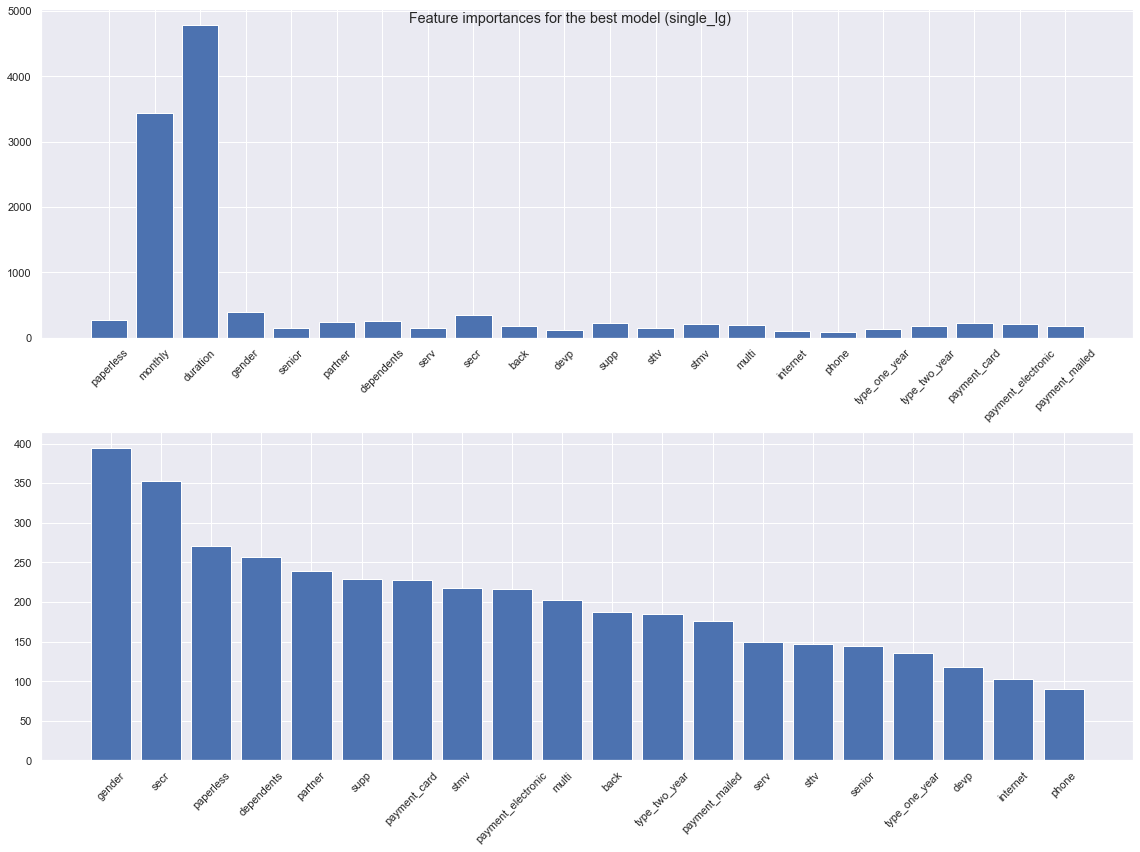

In [158]:
plt.figure(figsize=(16, 12))
plt.suptitle('Feature importances for the best model (single_lg)')

plt.subplot(211)
plt.bar(x=df_importances.index, height=df_importances.values)
plt.xticks(rotation=45)

plt.subplot(212)
plt.bar(x=df_importances_little.index, height=df_importances_little.values)
plt.xticks(rotation=45)

plt.tight_layout(h_pad=0.8)
plt.show()

Информацию о значимости признаков можно учитывать при разработке маркетинговых мероприятий для удержания клиентов в компании - не распыляться на всё подряд, а сфокусироваться на действительно важных факторах.

## Вывод по построению моделей машинного обучения

Самый высокий результат удалось достичь при помощи модели, основанной только на одном алгоритме и обученной на всех имеющихся данных сразу. То есть, сама модель - это простая одиночная модель, без каких-либо ансамблей и комбинаций.

Различные усложнения приводили лишь к снижению значений метрик, а в некоторых случаях - к утрате адекватности. Вероятные причины снижения качества:
* уменьшение размера обучающей выборки как по числу объектов, так и по числу признаков (стратифицированные модели);
* добавление столбца с вероятностями, рассчитанными ранее другой моделью (двойные модели).

С первым пунктом всё понятно. По второму пункту можно сказать следующее. Модель при обучении понимает, что вероятности очень хорошо соотносятся с реальным классом, и придаёт этому признаку значительный вес. Соответственно, те ошибки, что заложены в вероятности, модель переносит и на свой результат. Плюс добавляет свои собственные ошибки. Отсюда и снижение качества.

Тем не менее, есть исключение: нейронная сеть в ходе исследования стабильно показывала лучшие результаты именно на данных, содержащих столбец с вероятностями. Именно на таком наборе данных обучен и протестирован окончательный вариант.

Важную роль играет подготовка данных: предобработка, кодирование, масштабирование, удаление коррелирующих признаков. Без тщательной подготовки признаков модель обучится хуже.

Модель, полностью удовлетворяющая требованиям ТЗ, построена.

# Отчёт о выполненной работе

### Выполненные задачи

#### Подготовка данных

На этом этапе основной упор был сделан на подготовку данных к исследовательскому анализу. Подготовка данных для работы с моделями машинного обучения выполнялась уже после проведения исследовательского анализа - в соответствующем разделе.

Подготовка, в основном, сводилась к предобработке данных: поиск пропусков, дубликатов, выбросов, аномалий, а также приведение типов, переименование столбцов, некоторые проверки и т.п.

Данные оказались весьма чистыми: пропусков, дубликатов, выбросов, аномалий не обнаружено, за исключением нескольких строк, в которых пропуск был вполне объясним и закономерен. Предобработка сводилась, в основном, к приведению типов. Каких-либо трудноразрешимых проблем в ходе её выполнения не возникло.

#### Исследовательский анализ данных

Выделен целевой признак (факт ухода клиента из компании). Создан новый признак (длительность пребывания клиента в компании) на основе столбцов, которые сами по себе не могут быть признаками (дата прихода и ухода клиента). Впоследствии оказалось, что этот признак - важнейший.

Исследована связь каждого из признаков с целевым признаком, что позволило лучше понять данные. Каких-либо аномалий, противоречий на этом этапе выявлено не было. Все результаты - объяснимые и более-менее ожидаемые.

#### Построение моделей машинного обучения¶

На этом этапе непосредственно решается задача, поставленная в ТЗ: прогнозирование оттока клиентов.

Ключевые шаги в решении задачи:
* тщательная подготовка признаков;
* разработка подходящей сетки гиперпараметров;
* настройка гиперпараметров, не входящих в сетку (при инициализации модели).

Качество выполнения этих шагов решающим образом повлияло на успешность обучения моделей. Важен также выбор эффективных алгоритмов, на основе которых модели строились.

Выполнена подготовка данных для работы с моделями машинного обучения (согласно плану): удаление ненужных столбцов, объединение таблиц, проверка на корреляцию, кодирование категориальных признаков. А после каждого разбиения на выборки - масштабирование количественных признаков.

Разбиение на выборки выполнялось несколько раз, поскольку для каждого типа моделей - одиночных, стратифицированных, двойных - требовались свои выборки (включены ли все объекты или некоторые их срезы; наборы признаков - различаются).

План по разработке моделей, за одним исключением, выполнен в полном объёме. Исследованы как одиночные модели, так и их различные комбинации. Помимо алгоритмов классического машинного обучения (*Random Forest*, *Logistic Regression*, *Light GBM*), была построена полносвязная нейронная сеть.

Исключение - не выполнен пункт плана по построению модели второго уровня только на основе вероятностей, ранее рассчитанных другими моделями. Из-за высокой связи признаков-вероятностей между собой (коэффициент корреляции: 0,83...1,00) пришлось оставить из них только один признак. Построить модель только на одном признаке нельзя, поэтому от идеи пришлось отказаться.

Самые высокие результаты показали одиночные модели (лучшая - на основе *LightGBM*). Остальные - хуже. Наиболее вероятные причины:
* для стратифицированных моделей и нейронной сети - недостаточный объём данных (количество объектов);
* для двухуровневых моделей - наложение ошибок модели первого уровня на собственные ошибки модели второго уровня.

При этом нейронная сеть, наоборот, показала лучшие результаты именно на наборе данных для двухуровневых моделей, включающем признак-вероятность.

### Итоговая модель

Модель, лидирующая по основной (***ROC-AUC* = 0.888**) и дополнительной (***Accuracy* = 0.818**) метрикам, а также лидирующая наряду с другими моделями (разница - в пределах погрешности) по полноте охвата (***Recall* = 0.783**), - это **одиночная** модель на основе алгоритма ***LightGBM***.

Модель полностью удовлетворяет требованиям ТЗ.

### Перспективные модели

Результаты, полученные в ходе исследования, допускают возможность построения модели с ещё более высоким качеством. Для этого необходимо наличие набора данных по кратно большему числу клиентов.

Стратифицированные модели и модель на основе нейронной сети показали не самые высокие результаты из-за недообучения в связи с малым размером обучающей выборки. Сняв это ограничение (размер выборки), можно раскрыть весь их потенциал.

Однако, стоит заметить, что максимальное использование потенциала модели ещё не означает, что такая модель обязательно обойдёт по качеству все остальные и станет лучшей. Уже имеющаяся лучшая модель после переобучения на большем наборе данных, вероятно, тоже станет ещё лучше.

Для решения этой задачи потребуется провести лишь небольшое дополнительное исследование на основе уже имеющихся наработок. Но при этом не гарантируется, что результат, полученный в ходе такого исследования, превзойдёт по качеству тривиальное переобучение уже имеющейся модели на большем наборе данных. Решение о целесообразности данного мероприятия - за бизнесом.

### Заключение

Модель эффективно (в соответствии с требованиями ТЗ) выполняет поставленную задачу - прогнозирует отток клиентов. Модель рекомендуется к применению в бизнесе.

Наличие кратно большего набора данных позволит провести дополнительное исследование (на основе уже имеющихся наработок), в результате которого могут быть разработаны (доработаны) альтернативные, более качественные модели.